<a href="https://colab.research.google.com/github/jamoreno22/INF395-2020-Tarea1/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr style="height:2px;border:none"/>
<h1 align='center'> <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />

INF-395 / 477 / 577 Tarea 1 Redes Neuronales Artificiales - 2020-1 </h1>

<H3 align='center'> Integrantes: Javier Moreno - Gonzalo Oberreuter </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en tensorflow, keras, pandas y numpy
* Redes Densas Feed Forward
* Regularización y Dropout
* Exploding & Vanishing Gradient
* Skip Connections
* Learn Rate Decay
* Optimizadores
* Redes Convolucionales
* Image Data Augmentation
* Interpretabilidad CNNs


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno para toda la tarea, con tal de que todos los entregables estén bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "Aerlio") al correo electrónico del ayudante (*<tomas.ochoa.14@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF395/477/577-2020 Tarea1]
* Fecha de entrega y presentaciones: 13 de Noviembre. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Conceptos básicos de redes neuronales  <br>
[2.](#segundo) Reconocimiento de lenguaje de señas <br>
[3.](#tercero) Interpretabilidad de CNNs, transfer learning, y skip connections <br>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guías y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.

**Es ÁLTAMENTE recomendado realizar esta tarea en _Colab_ de Google (https://colab.research.google.com/notebooks/intro.ipynb#recent=true), con el fin de no depender del rendimiento de su computador personal al momento de entrenar redes neuronales y poder compartir de forma fácil sus avances con su compañer@ de trabajo.** Si bien conlleva sus pros y contras utilizar _Colab_ , existirá una curva de aprendizaje personal que lo ayudará a sacar el mayor provecho a esta herramienta, por ejemplo aprendiendo a guardar los avances realizados, evitando tener que ejecutar todo el código cada vez que se abra _Colab_ . *Tip: Una vez abierto un notebook en _Colab_ ir a **entorno de ejecución**->**Cambiar tipo de entorno de ejecución**, y seleccionár TPU como acelerador por hardware para redes feedforward y GPU para redes convolucionales.*.

# 1. Conceptos básicos de redes neuronales

De las redes neuronales artificiales más simples se encuentran las redes densas o _Feed Forward_, donde todas las neuronas de una capa están conectadas a todas las salidas de la capa anterior y envían su señal de activación a todas las neuronas de la siguiente capa. Estas redes, si bien son las más simples, suelen tener desempeños bastante buenos, y en muchas aplicaciones reales son utilizadas, ya sea por si solas o en combinación con otros modelos. Además, son las redes donde más fácil se pueden observar muchos de los fenómenos que se han descubierto a lo largo de los años de desarrollo de esta área del conocimiento, tanto por ser de las redes vigentes más antiguas y por su estructura relativamente simple. En esta primera parte de la tarea exploraremos las redes densas y algunos de sus hiperparámetros más relevantes como la profundidad, el número de unidades, learning rate, etc...; estudiaremos también algunos métodos de regularización y evidenciaremos el problema del _vanishing gradient y el _exploding gradient_, viendo también algunos optimizadores existentes.


<h1 align='center'> <img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/water-flea-daphnia-magna-ted-kinsman.jpg" width="40%" height="30%" /> </h1>

Para realizar esto usaremos un problema de regresión sencillo y utilizaremos los paquetes tensorflow y keras para explorar los conceptos básicos del mundo de las redes neuronales artificiales. Dado que puede tomar tiempo entrenar redes neuronales, y existe una amplia gama de conceptos a cubrir, utilizaremos un dataset de tamaño limitado con menos de 1000 observaciones, recordar que las redes neuronales tienen una naturaleza _data hungry_ por lo que su desempeño se puede ver limitado por la poca cantidad de observaciones en algunos casos. El dataset en cuestión consiste de 8 atributos (descriptores moleculares) de 546 productos químicos usados para predecir la toxicidad acuática aguda hacia la especie Daphnia Magna, para su descarga y descripción más detallada: https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity.

## 1.a Carga de datos y preprocesamiento.

##### I) Partiremos cargando los datos. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files   #-> For Google Colab, there are other methods
import io
uploaded = files.upload()
header_list = ["TPSA","SAacc","H-050","MLOPG","RDCHI","GATS1p","nN","C-050","LC50-response"]
df2 = pd.read_csv(io.BytesIO(uploaded['qsar_aquatic_toxicity.csv']),names=header_list,sep=";")

Saving qsar_aquatic_toxicity.csv to qsar_aquatic_toxicity (2).csv


##### II) **Comente y visualice** las distribuciones de cada atributo del dataset utilizando herramientas estadísticas básicas, boxplots e histogramas.

In [ ]:
df2.describe()

,TPSA,SAacc,H-050,MLOPG,RDCHI,GATS1p,nN,C-050,LC50-response
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


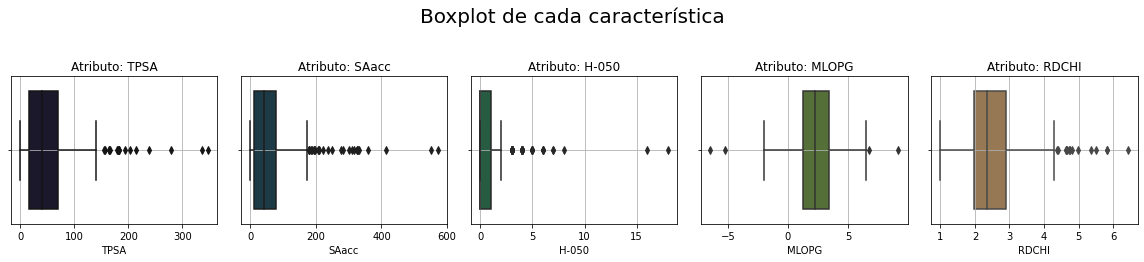

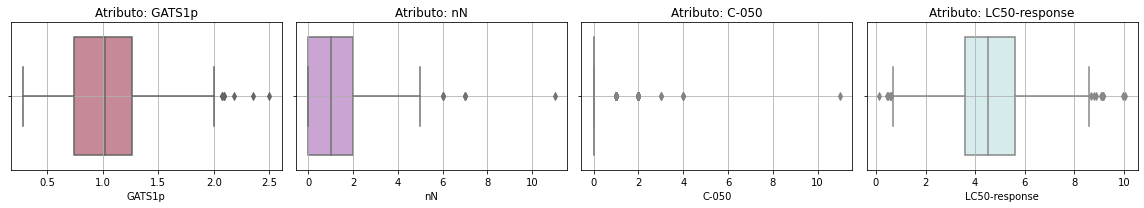

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[16,3] # <- Controla el tamaño del plot dentro del Notebook
import seaborn as sns  # <- Herramienta complementaria para distintos tipos de plots
cols=sns.color_palette("cubehelix", 9) # <-Paleta de colores a utilizar 9 es el número de colores que componen la paleta
plt.suptitle('Boxplot de cada característica',size=20,y=1.2)
k,K=1,1
for i in df2.columns[:]:
  if K<=5: plt.subplot(1,5,k)
  else: plt.subplot(1,4,k)
  plt.title('Atributo: '+str(i))
  sns.boxplot(df2[i],color=cols[K-1])
  plt.tight_layout()
  plt.grid()
  if k==5:
      k=1
      K+=1
      plt.show()
  else:
      k+=1
      K+=1

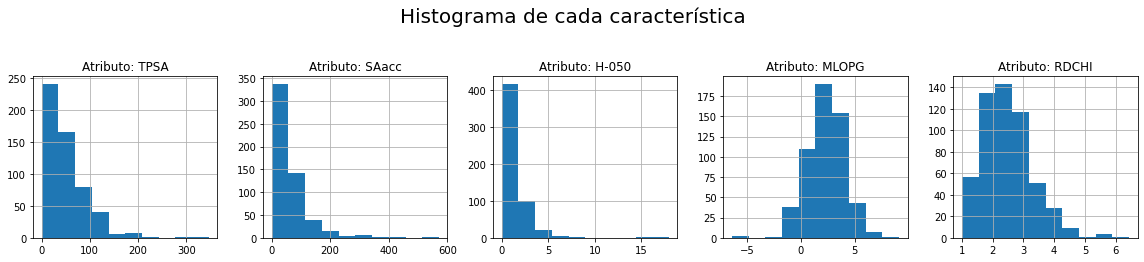

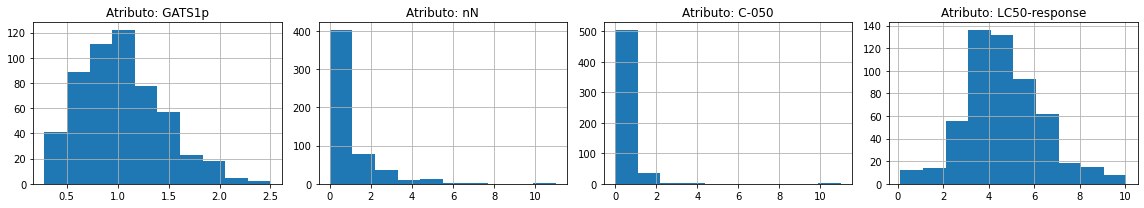

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16,3] # <- Controla el tamaño del plot dentro del Notebook
plt.suptitle('Histograma de cada característica',size=20,y=1.2)
k,K=1,1
for i in df2.columns[:]:
  if K<=5: plt.subplot(1,5,k)
  else: plt.subplot(1,4,k)
  plt.title('Atributo: '+str(i))
  plt.hist(df2[i])
  plt.tight_layout()
  plt.grid()
  if k==5:
      k=1
      K+=1
      plt.show()
  else:
      k+=1
      K+=1
  



En base a tanto los boxplot como los histogramas se puede decir que la mayoria de los atributos sigue una distribución de tipo _normal_ o _gamma_, debido a la concentración de los valores en ciertos puntos en particular junto a una varianza uniforme o hacia cierta dirección en particular. 

##### III) **Separe** el dataset en conjuntos de entrenamiento, validación y test, para luego estandarizar, considere un 70% de los datos para entrenamiento, un 20% para validación y un 10% para test. Para esto puede utilizar la librería sklearn, en particular las funciones StandarScaler y train_test_split. **Verifique** que el tamaño de los conjuntos se asemeje al indicado. 

**Pregunta:** ¿Cuál es la función de cada uno de estos conjuntos?

Para aclarar conceptos acerca de estos conjuntos: https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=df2.drop(columns=['LC50-response'])
y=np.asarray(df2['LC50-response']).reshape(-1,1)
x_tr, x_test, y_tr, y_test  = train_test_split(x, y, test_size=0.1, shuffle=True)
x_tr, x_val, y_tr, y_val = train_test_split(x_tr, y_tr, test_size=0.2/0.9, shuffle=True)
##x_tr2, x_test2, y_tr2, y_test2, x_val2, y_val2 = x_tr, x_test, y_tr, y_test, x_val, y_val

In [ ]:
scaler_x = StandardScaler()
scaler_x.fit(x_tr)
x_tr = scaler_x.transform(x_tr)
x_val = scaler_x.transform(x_val)
x_test = scaler_x.transform(x_test)
scaler_y = StandardScaler()
scaler_y.fit(y_tr.reshape(-1,1))
y_tr = scaler_y.transform(y_tr)
y_val = scaler_y.transform(y_val)
y_test = scaler_y.transform(y_test)
dataSize = df2.shape[0]
print('Tamaños teoricos de dataset de entrenamiento, validación y test:', dataSize*0.7, dataSize*0.2, dataSize*0.1)
print('Tamaños reales de dataset de entrenamiento, validación y test:',x_tr.shape[0], x_val.shape[0], x_test.shape[0])


Tamaños teoricos de dataset de entrenamiento, validación y test: 382.2 109.2 54.6
Tamaños reales de dataset de entrenamiento, validación y test: 381 110 55


La funcion de cada uno de los conjuntos es la siguiente:
* Entrenamiento (training): Como lo dice su nombre, se utiliza para entrenar la red y en consecuencia modificar los parametros entrenables (pesos) del modelo.
* Validacion (validation): Sirve para validar los resultados de las predicciones que realice el modelo mientras es entrenado.
* Conjunto de prueba (test): Este conjunto se utiliza para confirmar la generalizacion del modelo una vez se termina de entrenar.

##### IV) **Visualice** de la forma que estime conveniente para realizar comparaciones, las distribuciones para todas las variables (atributos y target) antes de estandarizar, y después de estandarizar para los conjuntos de entrenamiento, validación y test. **Comente**. 

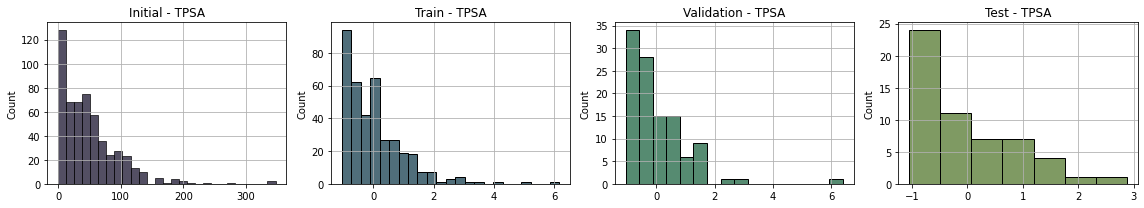

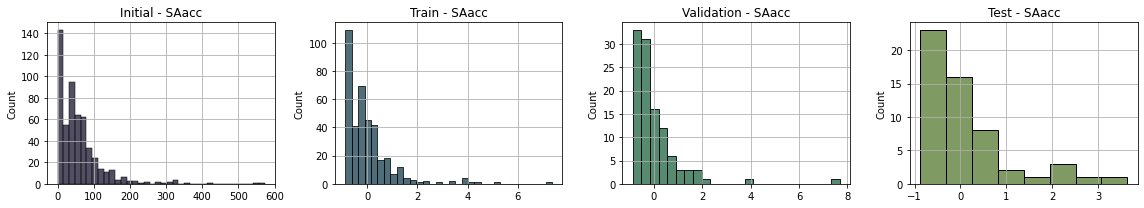

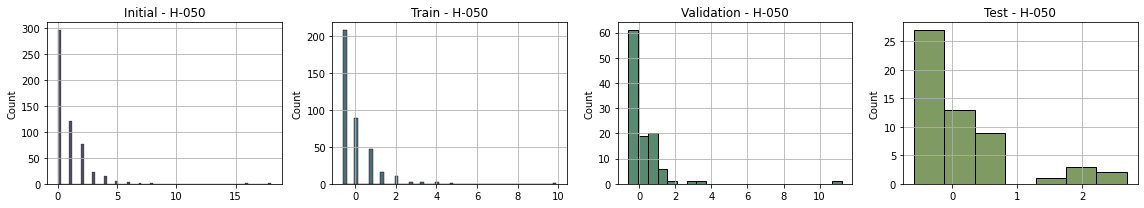

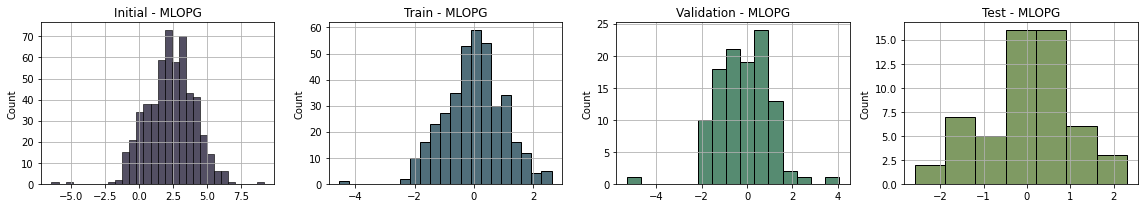

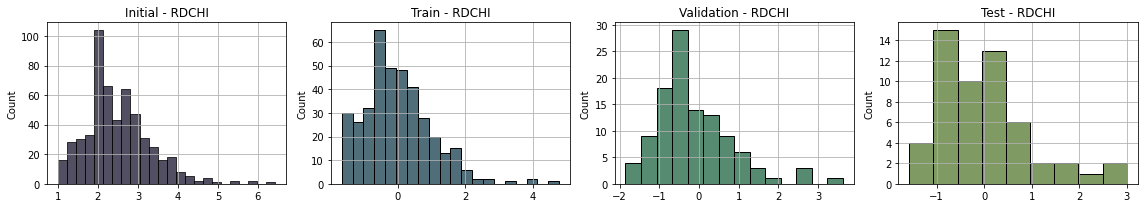

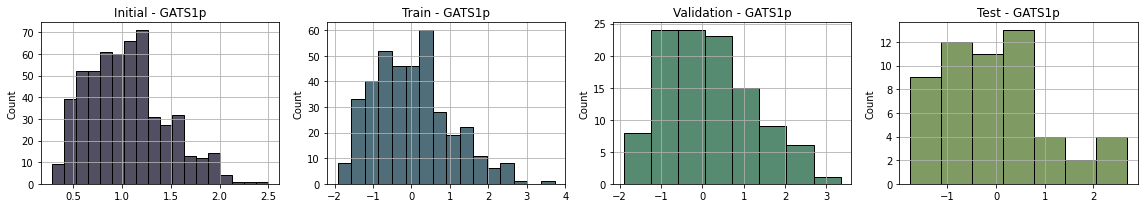

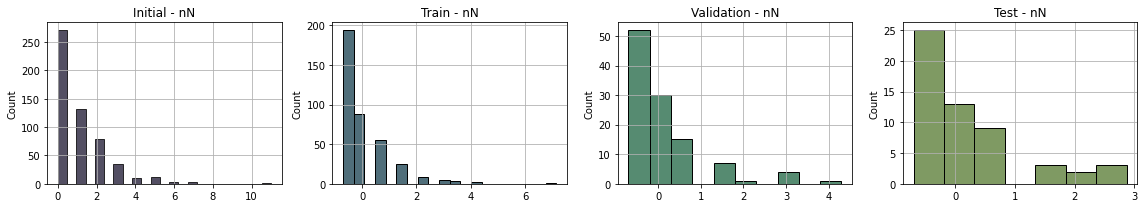

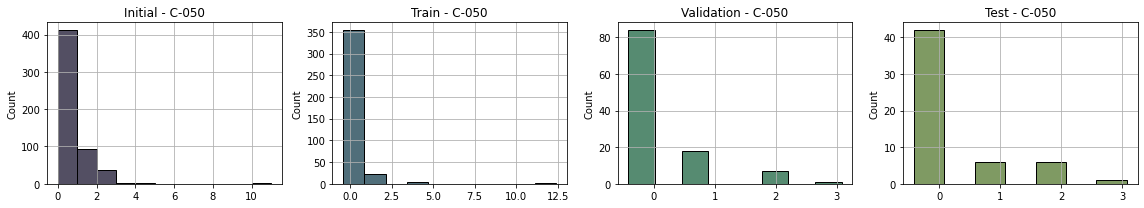

In [ ]:
conjunto=["Initial","Train","Validation","Test"]
for j in range(8): # <- completar
  vars=[np.asarray(x)[:,j],x_tr[:,j],x_val[:,j],x_test[:,j]]
  for k in range(4):
    plt.subplot(1,4,k+1)
    plt.title(conjunto[k]+" - "+header_list[j]) # <- completar
    sns.histplot(vars[k], color=cols[k]) # <- completar puede usar boxplot, histogramas u otra herramienta
    plt.tight_layout()
    plt.grid()
  plt.show()
  #ARREGLAR
  

Gracias a la información provista por los graficos, se nota que luego de la estandarización todos los atributos de los 3 conjuntos generados quedaron en un mismo orden de magnitud, lo cual ayudará con la actualización de gradientes al momento de entrenar.

##### V) **Pregunta:** ¿Por qué seleccionar los conjuntos de entrenamiento, validación y test _by hand_ es una mala práctica? ¿Qué beneficios _tramposos_ se pueden obtener de esta mala práctica?.

Por que se podrían llegar a escoger arbitrariamente datos muy parecidos para cada conjunto, lo cual implicaría en un accuracy muy cercano a 1 y una perdida de habilidad de generalizar del modelo.

##### VI) **Bonus:** Tome decisiones, p.ej realice transformaciones, manipulaciones, etc... de manera fundamentada que ayuden a mejorar la conformación de los conjuntos para el posterior entrenamiento de la red neuronal. Evite malas prácticas.

## 1.b Primera arquitectura

Partiremos cargando los paquetes necesarios. Conozcamos tensorflow y keras:

_TensorFlow_ es una librería de computación matemática, que ejecuta de forma rápida y eficiente gráficos de flujo. Un gráfico de flujo está formado por operaciones matemáticas representadas sobre nudos, y cuya entrada y salida es un vector multidimensional (o tensor) de datos. 

_Keras_ es una abstracción, un API High-level, para la creación de modelos de aprendizaje. Aporta una sintaxis homogénea y un interface sencillo, modular y ampliable para la creación de redes neurales.

Las redes neurales son un tipo particular de gráfico de flujo de datos. Por tanto, TensorFlow y Keras combinan perfectamente.

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras import activations
from tensorflow.python.keras.engine import input_layer

##### I) Entrene la siguiente red neuronal de una capa con funciónes de activación sigmoidales, función de pérdida MSE, optimizador SGD, y learning rate=0.01 por 500 epochs. Este entrenamiento toma menos de 20 segundos en _Colab_ con entorno de ejecución TPU

In [ ]:
from keras.optimizers import SGD
from keras.callbacks import History 

# Define architecture
input_dense= input_layer.Input(shape=(x_tr.shape[1]))
dense=layers.Dense(50, activation='sigmoid',use_bias=True)(input_dense)
output_dense=layers.Dense(1, activation='sigmoid',use_bias=True)(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')
# Define callbacks (No modificar patience!!!!!!!!! es solo para que la conozcan por el momento)
my_callbacks = [History(), # Returns validation and training loss
    tf.keras.callbacks.EarlyStopping(patience=500,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)] 

# Train model
hist_1_b_i = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks) 
#verbose=1 shows epoch per epoch evolution, not necessary if you are planning to plot hist

Note cómo se puede evaluar todo el conjunto de test en sólo un paso:

In [ ]:
y_pred=model(x_test) # model.predict(x_test) returns numpy array
test_batch_loss=tf.keras.losses.MSE(y_test, y_pred)

Note cómo se obtiene el error MSE para cada observación en el conjunto de test. Se introdujo a propósito la notación batch para definir la variable python, esta dimensión debe ser siempre la primera dimensión del tensor cuando entrenamos redes neuronales. Un batch es un conjunto de observaciones, dado que estamos tratando con la evaluación del conjunto de test se utilizó un batch de tamaño máximo (igual a la cantidad de observaciones del conjunto de test).

In [ ]:
test_batch_loss

<tf.Tensor: shape=(55,), dtype=float32, numpy=
array([1.0914637e-01, 3.1662626e+00, 1.6345637e+00, 5.4851429e-05,
       2.5822023e-01, 3.8032690e-01, 1.0571672e-01, 6.0635680e-01,
       4.6990913e-01, 1.4342545e-02, 4.0052739e-01, 8.1329793e-01,
       1.7346984e-01, 6.8352824e-01, 1.3882227e-01, 9.8392246e-03,
       1.2281370e-01, 4.1101936e-01, 2.9579379e-02, 6.3199379e-02,
       7.2430648e-02, 8.7644172e-01, 6.9243580e-02, 7.1838894e-04,
       4.3816470e-02, 1.6456705e-01, 3.2252800e-02, 2.0707239e-01,
       1.8030920e+00, 7.8774458e-01, 6.1576015e-01, 1.0576508e+00,
       1.5600088e-01, 1.7380092e+00, 3.2627082e-01, 3.6907837e-01,
       3.3517511e+00, 2.1306198e-02, 2.3583917e-02, 2.0137422e-02,
       4.1940436e-01, 1.0913718e+00, 1.4369042e-01, 3.2385367e-01,
       4.2201829e-01, 2.7820233e-01, 1.8494114e-01, 8.8848805e-01,
       5.4319060e-01, 1.8474156e+00, 1.1457373e+00, 2.5272602e-01,
       7.1399708e+00, 7.1487415e-01, 5.6388664e-01], dtype=float32)>

Obtenga el error MSE promedio para todo el conjunto de test. **Aprecie** cómo se graficará el proceso de entrenamiento de la red neuronal, tendrá que repetir este proceso para reportar resultados múltiples veces durante el ramo. Utilizar verbose=1 para reportar resultados **NO ES VÁLIDO**, dado que es de difícil lectura y ocupa una cantidad de espacio innecesaria, se recomienda utilizar esta opción para estimar cuánto tiempo se demorará en entrenar la red viendo un par de epochs, luego se puede pausar el entrenamiento y desactivar el verbose para volver a entrenar. Esto no es obligatiorio y condicional de cuánto epochs se están entrenando, sin embargo considere que un entrenamiento por 1000 epochs puede ocupar el equivalente a 10 páginas pdfs, lo que dificultará la navegación por el archivo, pues no siempre es posible plegar el output de una celda (depende de cómo se está visualizando el archivo, p.ej al ver un notebook por github no se podrán plegar los outputs). **Comente** el gráfico generado, **Preguntas:** ¿existe overfitting? **¿Qué conclusiones puede sacar al observar el error del conjunto de test y compararlo respecto al conjunto de entrenamiento y validación?**

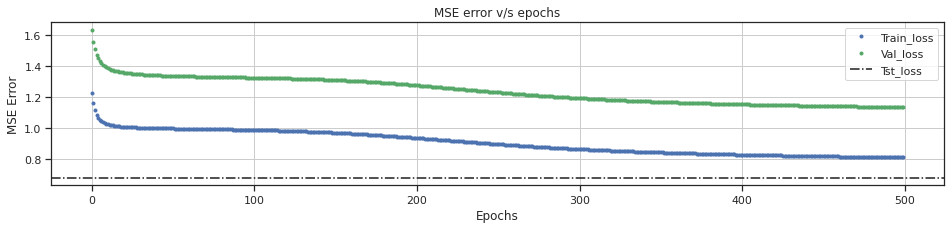

In [ ]:
test_loss_1_b_i=tf.math.reduce_mean(test_batch_loss).numpy() # .numpy() converts tensor to array, tf.convert_to_tensor converts array to tensor
plt.title("MSE error v/s epochs")
plt.plot(hist_1_b_i.history["loss"],"b.",label="Train_loss")
plt.plot(hist_1_b_i.history["val_loss"],"g.",label="Val_loss")
plt.axhline(y=test_loss_1_b_i,color="k",linestyle="-.",label="Tst_loss")
plt.xlabel("Epochs"),plt.ylabel("MSE Error")
plt.legend(),plt.grid()
plt.show()

Si existe overfitting, pues por la forma del grafico de error y al tener un mayor error de validación en comparación al de training se puede asumir que el modelo se adaptó de mejor manera al segundo conjunto nombrado. Respecto al error en el conjunto de test, si bien es mucho menor al de los otros dos conjuntos, esto puede deberse principalmente al tamaño de los grupos.


Para evitar reentrenar redes al reconectarse, la red neuronal entrenada se puede guardar (arquitectura, pesos, y configuración de entrenamiento) del siguiente modo: 

---> Para verificar que estamos guardando el modelo correctamente: Iniciaremos clonando el modelo, esta función copia la arquitectura del modelo pero no mantiene los pesos.

In [ ]:
model_clone=tf.keras.models.clone_model(model)
[np.all(model_clone.get_weights()[i]==model.get_weights()[i]) for i in range(len(model.get_weights()))]

[False, False, False, False]

----> Para esto setearemos los pesos del modelo clonado igual a los pesos del modelo original.

In [ ]:
model_clone.set_weights(model.get_weights())
[np.all(model_clone.get_weights()[i]==model.get_weights()[i]) for i in range(len(model.get_weights()))]

[True, True, True, True]

---> Procederemos a guardar el modelo

In [ ]:
import sys
sys.path.append('saved_model')

In [ ]:
model.save('saved_model/1_b_i')  #<- guardar modelo con pesos incluidos, cuidado con sobre escribir sobre modelos ya guardados
# esta función está por deprecarse, aún así de momento está funcionando
# existe la siguiente alternativa: 1) guardar los pesos del modelo model.save_weights("filepath"), 
# 2) luego al querer cargar el modelo se debe definir la arquitectura del modelo (la misma, e.d correr solo #define architecture en 1.b.i)  
# 3) usar model.set_weights(model.load_weights("filepath"))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/1_b_i/assets


---> Verificamos

In [ ]:

model_new=tf.keras.models.load_model('saved_model/1_b_i/') #<- cargar modelo
[np.all(model_clone.get_weights()[i]==model_new.get_weights()[i]) for i in range(len(model_new.get_weights()))] # <- verificar

[True, True, True, True]

##### II) **Entrene** una red neuronal con los mismos hiperparámetros que en la sección anterior pero con función de activación ReLU.

In [ ]:
input_dense= input_layer.Input(shape=(x_tr.shape[1]))
dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')
# Define callbacks (No modificar patience!!!!!!!!! es solo para que la conozcan por el momento)
my_callbacks = [History(), # Returns validation and training loss
    tf.keras.callbacks.EarlyStopping(patience=500,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)] 
hist_1_b_ii = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks) 
test_loss_1_b_ii=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()

##### III) **Cree** una función que grafique los resultados, puede basarse en el siguiente código. La función creada la puede ir modificando en los siguientes items para reducir esfuerzos (fijarse en que la visualización sea lo más clara posible). **Visualice y compare** los resultados con los obtenidos en el punto 1.b.I). **Comente**.

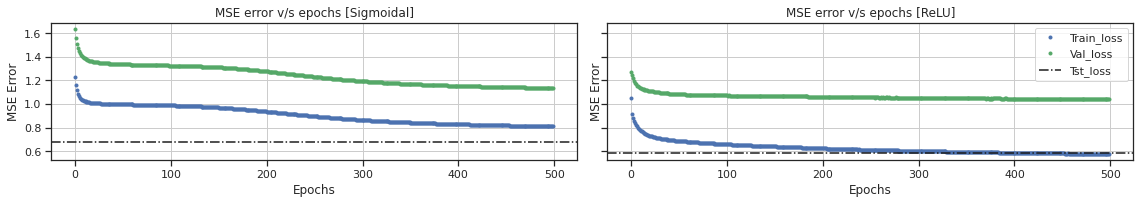

In [ ]:
plt.rcParams["figure.figsize"]=[16,3]
hists=[hist_1_b_i.history,hist_1_b_ii.history]
tsts=[test_loss_1_b_i,test_loss_1_b_ii]
titles=["MSE error v/s epochs [Sigmoidal]","MSE error v/s epochs [ReLU]"]
def graph_results(hists,tsts,titles):
  fig, axes = plt.subplots(1, len(hists), sharey=True) # sharey to keep the same y lims for all subplots. 
                                            # En algunos casos esto puede jugar en contra para una buena visualización -> ver siguiente comentario
  for i,ax in enumerate(axes):
    ax.set_title(titles[i])
    ax.plot(hists[i]["loss"],"b.",label="Train_loss")
    ax.plot(hists[i]["val_loss"],"g.",label="Val_loss")
    ax.axhline(y=tsts[i],color="k",linestyle="-.",label="Tst_loss")
    ax.set_xlabel("Epochs"),ax.set_ylabel("MSE Error")
    #  ax.set_ylim([lower,upper])  # <- Puede convenir insertar como entrada a la función límite inferiores y superiores para ajuste manual
    if i==len(axes)-1: ax.legend()
    ax.grid()
  plt.tight_layout()
  plt.show()

graph_results(hists,tsts,titles) # llamado simple para graficar

Comparando ambos graficos de los modelos entrenados en la sección 1b, se puede concluir que al utilizar la función de activación "RELU", si bien bajaron los errores de ambos conjuntos (training y validation), la forma sigue siendo la misma y en consecuencia sigue habiendo overfitting.

## 1.c Sensibilidad a hiperparámetros

##### I) **Utilice** la siguiente función (o implemente una propia) para **recopilar** el error de entrenamiento, validación y test **según** el número de capas en la red neuronal y el número de neuronas. Considere el mismo número de neuronas para cada capa. Seleccione dos valores para la cantidad de neuronas entre 10 y 100, y varíe la profundidad entre 1 y 3, e.d 6 redes en total. Utilice la f° de activación ReLU, 500 epochs, lr=0.01, y error MSE. **Encuentre los hiperparámetros (n° neuronas y profundidad) que obtienen el menor error de validación**. 

**Pregunta:** ¿Por qué el menor error de validación y no de test?

**Visualice** y **Comente** los resultados.

In [ ]:
def train_network_1_c_i(prof_dense,n_neurons):
  input_dense=input_layer.Input(shape=(x_tr.shape[1]))
  for i in range(prof_dense):
    if i==0:
      dense=layers.Dense(n_neurons, activation='relu',use_bias=True)(input_dense)
    else:
      dense=layers.Dense(n_neurons, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  # Compile model
  model.compile(optimizer=SGD(learning_rate=0.001),loss='mean_squared_error')
  # define callbacks (keep patience at 100)
  my_callbacks = [History(), # Returns validation and training loss
    tf.keras.callbacks.EarlyStopping(patience=100,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)] # Returns best validation loss
  # Train model
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return(hist,test_loss)

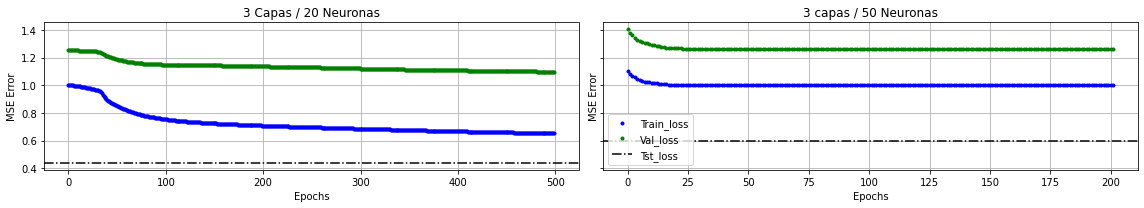

In [ ]:
h1,t1=train_network_1_c_i(3,20)
h2,t2=train_network_1_c_i(3,50)
graph_results([h1.history,h2.history],[t1,t2],["3 Capas / 20 Neuronas","3 capas / 50 Neuronas"])


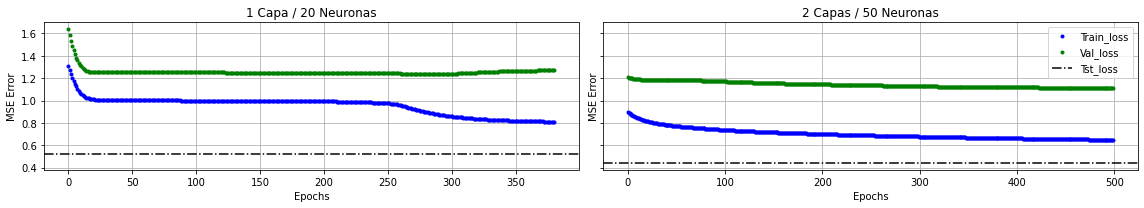

In [ ]:
h3,t3=train_network_1_c_i(1,20)
h4,t4=train_network_1_c_i(2,50)
graph_results([h3.history,h4.history],[t3,t4],["1 Capa / 20 Neuronas","2 Capas / 50 Neuronas"])


El menor error de validación se encuentra muy parecido entre los modelos que tienen 3 capas - 20 neuronas y 2 capas - 50 neuronas. Se busca un menor error de validación pues son los que comprueban la evolución del modelo a medida que se entrena, en cambio el de test se comprueba unicamente una vez se termina el entrenamiento.

##### II) **Realice** un experimento similar, ahora variando el learning rate entre [1e-6 y 1e-1], entrene 6 redes neuronales con distintos learning rate. Para esto **implemente una función** semejante a la utilizada en el punto anterior, use la arquitectura e hiperparámetros dados. **Encuentre el learning rate que obtiene el menor error de validación. Visualizar y comentar**

In [ ]:
def train_network_1_c_ii(learning_rate):
  input_dense= input_layer.Input(shape=(x_tr.shape[1]))
  dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
  dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  model.compile(optimizer=SGD(learning_rate=learning_rate),loss='mean_squared_error')
  my_callbacks = [History(), # Returns validation and training loss
      tf.keras.callbacks.EarlyStopping(patience=200,monitor="val_loss", # Mantener patience en 200
                                      restore_best_weights=True)]
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return(hist,test_loss)

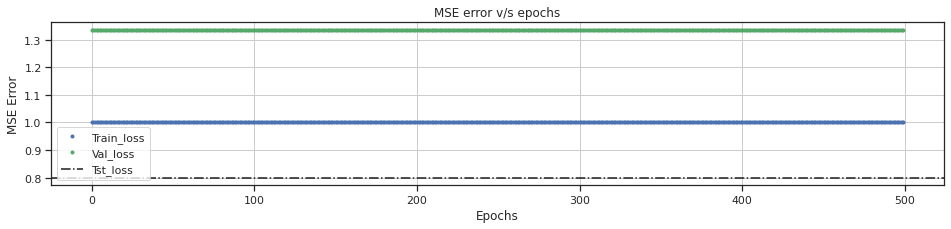

1.3355141878128052


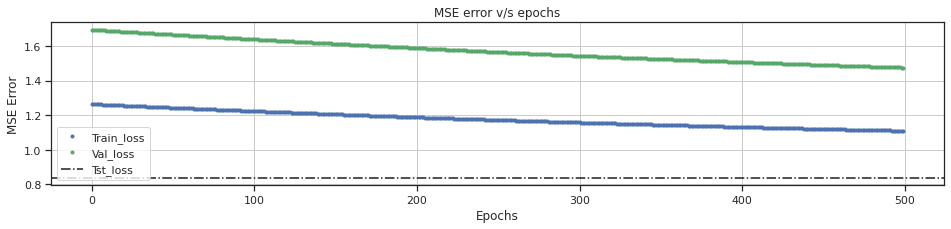

1.4749367237091064


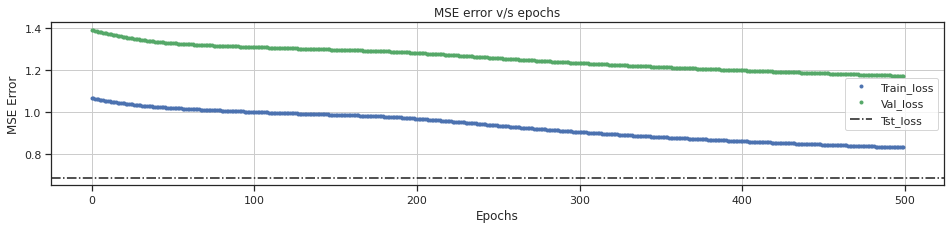

1.173834204673767


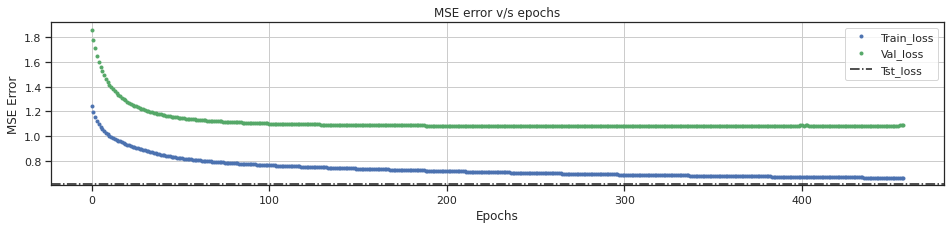

1.0801218748092651


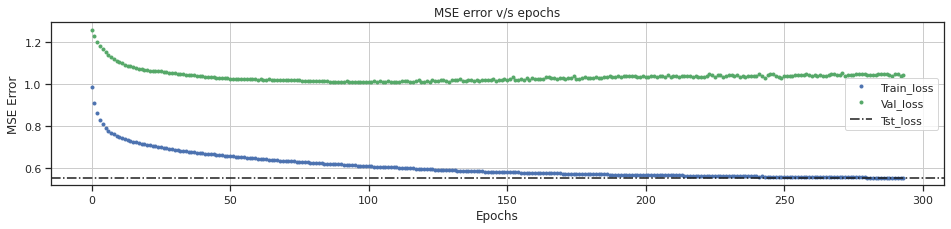

1.0078368186950684


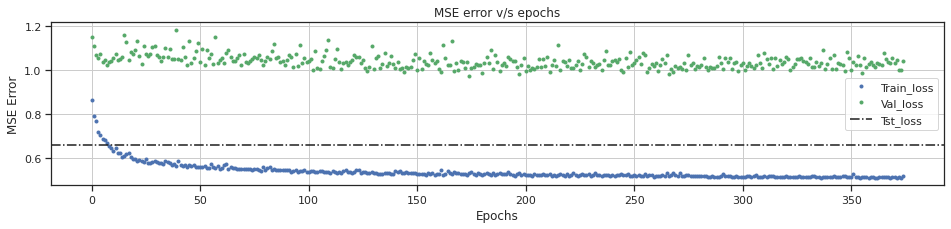

0.9727668166160583


In [ ]:
lear_rate = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1] #np.linspace(1e-6,1e-1,6)
for i in range(6):
  h5,t5=train_network_1_c_ii(lear_rate[i])
  min_val_loss_5=np.min(h5.history["val_loss"])
  plt.title("MSE error v/s epochs")
  plt.plot(h5.history["loss"],"b.",label="Train_loss")
  plt.plot(h5.history["val_loss"],"g.",label="Val_loss")
  plt.axhline(y=t5,color="k",linestyle="-.",label="Tst_loss")
  plt.xlabel("Epochs"),plt.ylabel("MSE Error")
  plt.legend(),plt.grid()
  plt.show()
  print(min_val_loss_5)

Considerando la función del learning rate (escalar el vector de actualización de los pesos), el primer resultado con menor hiperparametro fue el esperado, obteniendo el peor error de validación. Luego, los demás casos fueron bastante similares, destacando el que utiliza learning rate 1e-1, el cual tiene una curva de validation loss muy entropica.

##### III) **Realice** un experimento similar, ahora variando el learning decay, entrene 6 redes neuronales para distintos decay. Para esto **implemente una función** semejante a la utilizada en el punto anterior. **Encuentre el learning decay que obtiene el menor error de validación. Visualizar y comentar**

In [ ]:
def train_network_l_d(lear_decay):
  input_dense= input_layer.Input(shape=(x_tr.shape[1]))
  dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
  dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  model.compile(optimizer=SGD(learning_rate=0.01,decay=lear_decay),loss='mean_squared_error')

  my_callbacks = [History(), # Returns validation and training loss
      tf.keras.callbacks.EarlyStopping(patience=200,monitor="val_loss", # Mantener patience en 200
                                      restore_best_weights=True)]
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return(hist,test_loss)

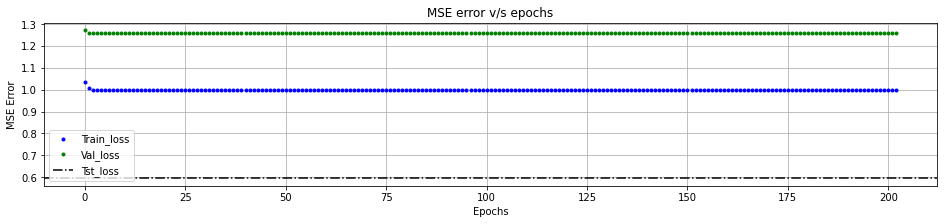

1.2617079019546509


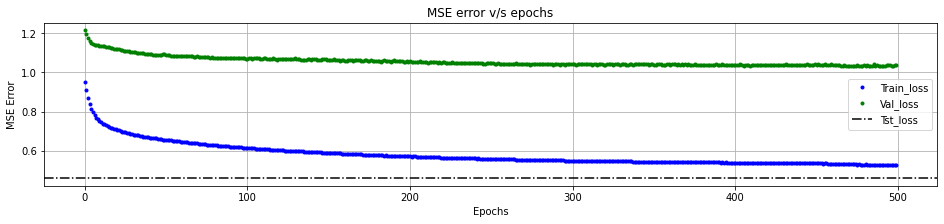

1.030639410018921


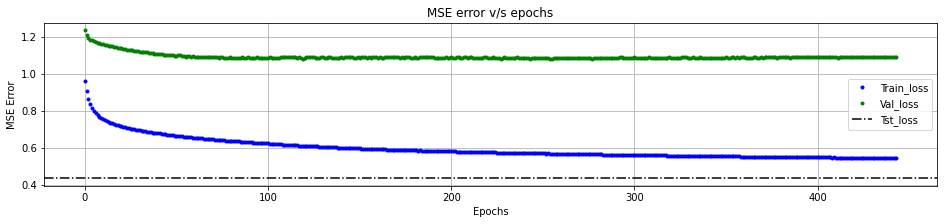

1.079681634902954


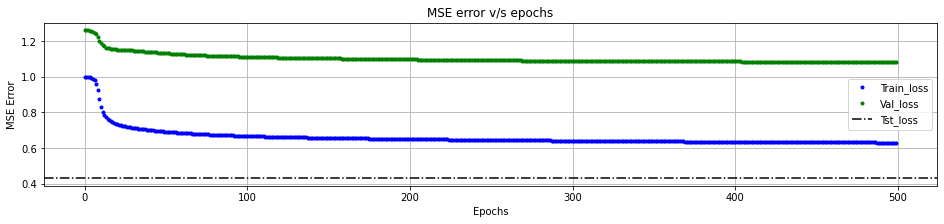

1.0829312801361084


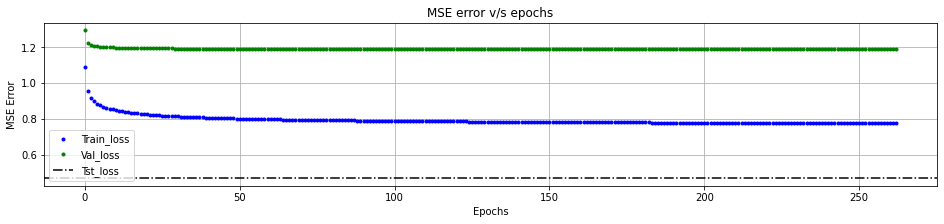

1.1905337572097778


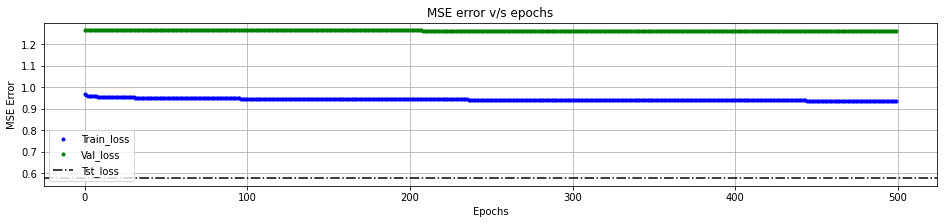

1.261772871017456


In [ ]:
lear_decay = np.logspace(-6,0,6)
lear_decay=np.around(lear_decay,decimals=6)
for i in range(6):
  h6,t6=train_network_l_d(lear_decay[i])
  min_val_loss_6=np.min(h6.history["val_loss"])
  plt.title("MSE error v/s epochs")
  plt.plot(h6.history["loss"],"b.",label="Train_loss")
  plt.plot(h6.history["val_loss"],"g.",label="Val_loss")
  plt.axhline(y=t6,color="k",linestyle="-.",label="Tst_loss")
  plt.xlabel("Epochs"),plt.ylabel("MSE Error")
  plt.legend(),plt.grid()
  plt.show()
  print(min_val_loss_6)


In [ ]:
lear_decay

array([1.0000e-06, 1.6000e-05, 2.5100e-04, 3.9810e-03, 6.3096e-02,
       1.0000e+00])

De los graficos presentados, aquel que utiliza un learning decay de 1.6e-05 es el que llega al menor validation loss. A diferencia de la sección anterior, el uso de learning decay provoco un suavizado en las curvas de los graficos de error.

##### IV) **Realice** un experimento similar, ahora variando el optimizador para la arquitectura e hiperparámetros dados, pruebe con los optimizadores [SGD, Adagrad, Adadelta, Adam y RMSprop]. Para esto **implemente una función** semejante a la utilizada en el punto anterior. **Pregunta:** ¿En qué optimizadores no tiene sentido utilizar el learning decay, por qué? **Visualizar y comentar**

In [ ]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

def train_network_opt(opt):
  input_dense= input_layer.Input(shape=(x_tr.shape[1]))
  dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
  dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  model.compile(optimizer=opt(learning_rate=0.001),loss='mean_squared_error')
  # Define callbacks
  my_callbacks = [History(), 
      tf.keras.callbacks.EarlyStopping(patience=500,monitor="val_loss", # (No modificar patience!!!!!!!!!)
                                      restore_best_weights=True)]
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return(hist,test_loss)

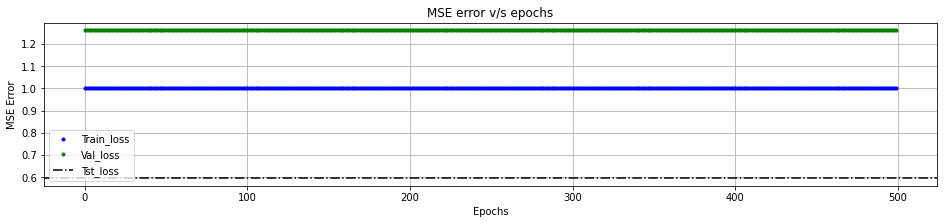

1.2617079019546509


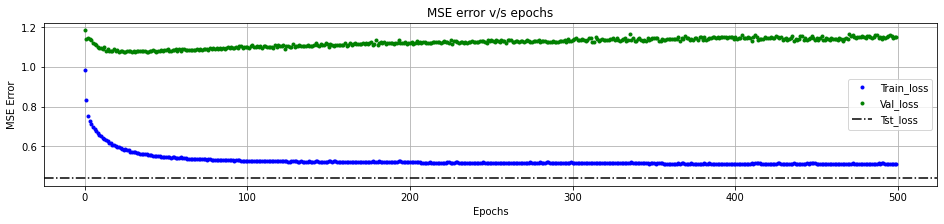

1.0735526084899902


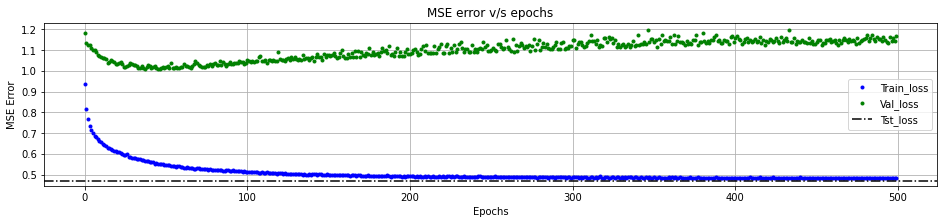

1.0088841915130615


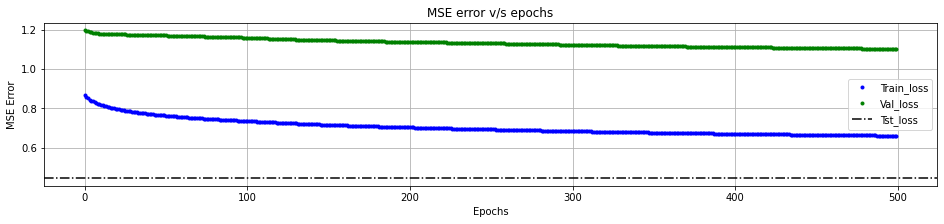

1.1022331714630127


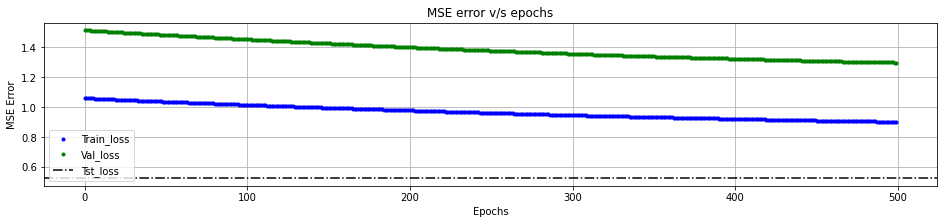

1.2990466356277466


In [ ]:
optimizers = [SGD, Adam, RMSprop, Adagrad, Adadelta]
for i in optimizers:
  h6,t6=train_network_opt(i)
  min_val_loss_6=np.min(h6.history["val_loss"])
  plt.title("MSE error v/s epochs")
  plt.plot(h6.history["loss"],"b.",label="Train_loss")
  plt.plot(h6.history["val_loss"],"g.",label="Val_loss")
  plt.axhline(y=t6,color="k",linestyle="-.",label="Tst_loss")
  plt.xlabel("Epochs"),plt.ylabel("MSE Error")
  plt.legend(),plt.grid()
  plt.show()
  print(min_val_loss_6)

Dentro de los resultados obtenido con los diferentes optimizadores, se puede notar que aquel que usa el algoritmo Adagrad resulta en un validation loss menor. Con respecto a cuales metodos no se ven afectados por un learning decay, son Adam, Adagrad yRMSPROP, pues estos de por si actualizan el learning rate arbitrariamente.

##### V) **Realice** un expermiento similar, ahora variando el batch_size entre 1 y x_tr.shape[0] incluyendo los extremos. Entrene 6 redes neuronales con la arquitectura e hiperparámetros dados. Para esto **implemente una función** semejante a la utilizada en el punto anterior. Para un batch_size=1 el entrenamiento se va a demorar más que en puntos anteriores, aprox. 1 segundo en _Colab_. **Visualizar y comentar**. **Preguntas:** ¿A qué es equivalente entrenar con un batch_size = 1 y batch_size=x_tr.shape[0]? ¿Cuál es el batch_size por default?

In [ ]:
n_batches=6
batches=np.round(np.linspace(1,x_tr.shape[0],n_batches)).astype(np.int32)
def train_network_b(batch):
  input_dense= input_layer.Input(shape=(x_tr.shape[1]))
  dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
  dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
  # Define callbacks
  my_callbacks = [History(), 
      tf.keras.callbacks.EarlyStopping(patience=100,monitor="val_loss", # (No modificar patience!!!!!!!!!)
                                      restore_best_weights=True)]
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, batch_size=batch,validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return(hist,test_loss)

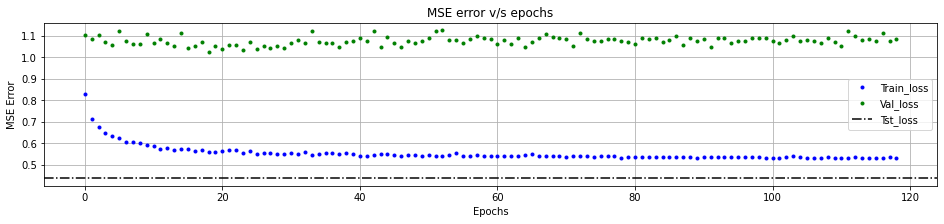

1.0241754055023193


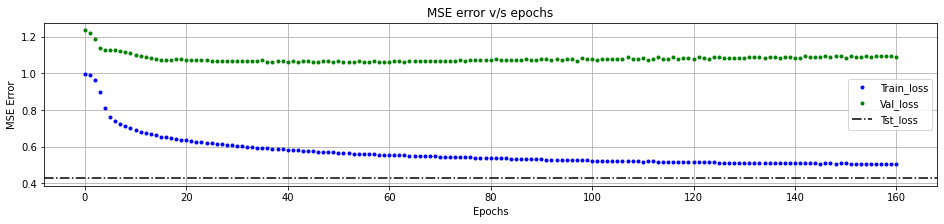

1.0610772371292114


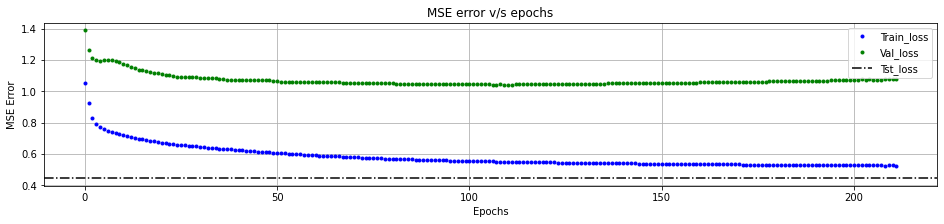

1.0425238609313965


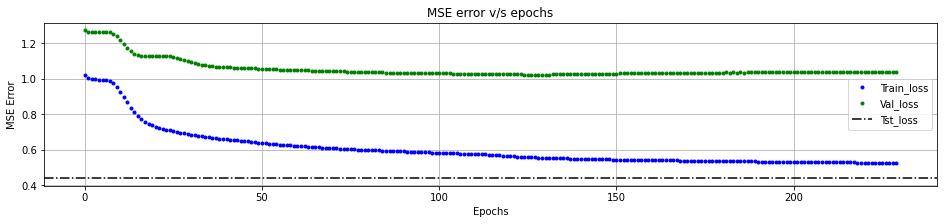

1.022621750831604


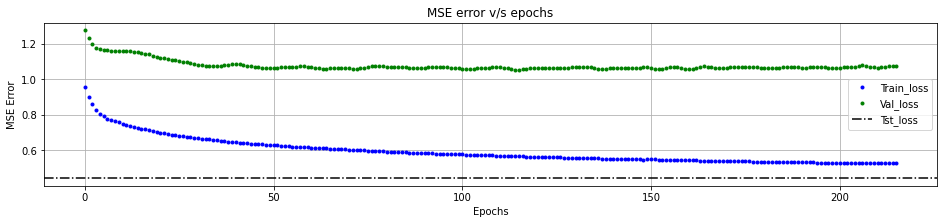

1.0544253587722778


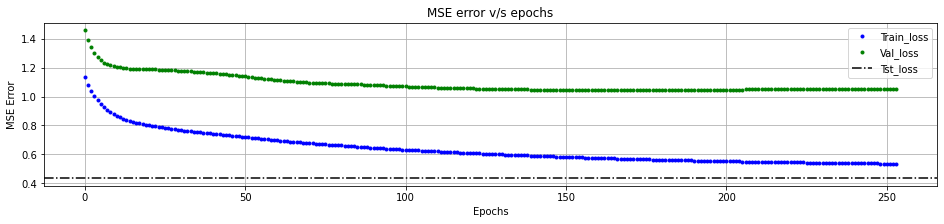

1.0437337160110474


In [ ]:
for i in batches:
  h6,t6=train_network_b(i)
  min_val_loss_6=np.min(h6.history["val_loss"])
  plt.title("MSE error v/s epochs")
  plt.plot(h6.history["loss"],"b.",label="Train_loss")
  plt.plot(h6.history["val_loss"],"g.",label="Val_loss")
  plt.axhline(y=t6,color="k",linestyle="-.",label="Tst_loss")
  plt.xlabel("Epochs"),plt.ylabel("MSE Error")
  plt.legend(),plt.grid()
  plt.show()
  print(min_val_loss_6)

Utiliza un batch_size igual a 1 significaría actualizar los parametros entrenables por cada dato del conjunto de entrenamiento, lo cual es equivalente a usar el metodo de optimización Stochastic gradient descent. El segundo caso corresponde a utilizar todo el conjunto para actualizar los parametros, lo que es equivalente al metodo Batch gradient descent. El batch size pro default es de 32.
Para el caso de los modelos entrenados en la sección, se destaca que aquellos con batch_size alto poseen un menor error de validación durante y finalizado el aprendizaje.

## 1.d Inicializaciones, pesos y gradientes

##### I) Utilizando las siguientes arquitecturas proceda a graficar la distribución de pesos de las distintas capas bajo inicialización uniforme (incluyendo bias). Adicionalmente calcule el gradiente de la función de pérdida (loss) para el conjunto de entrenamiento (promedio del gradiente del error de todos los datos de entrenamiento) respecto a los pesos en las distintas capas. **Visualize, compare y comente**

In [ ]:
# Define architecture (1)
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(input_dense)
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
output_dense=layers.Dense(1, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)

# Define architecture (2)
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(input_dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model2=models.Model(inputs=input_dense, outputs=output_dense)

# Get weights
weights=model.get_weights()
weights2=model2.get_weights()

# Get gradient
with tf.GradientTape() as tape:
  y_pred = model(x_tr)
  loss = tf.reduce_mean(tf.square(y_pred-y_tr)) #MSE loss
  grad=tape.gradient(loss,model.trainable_weights)

with tf.GradientTape() as tape2:
  y_pred = model2(x_tr)
  loss = tf.reduce_mean(tf.square(y_pred-y_tr)) #MSE loss
  grad2=tape2.gradient(loss,model2.trainable_weights)
   
# gradient only calculated, if u want to apply it to update weights the model must have an optimizer, for example set model.optimizer=tf.keras.optimizers.Adam(lr) 
# and then use: model.optimizer.apply_gradients(zip(grad, model.trainable_variables)) to update weights. Equivalent to an epoch of maximum batch size (all training set) in this code
# model.compile and model.fit does this, with extra implementations, like variable batch size,
# so it's not necessary to do it manually in this case. If u pay attention to the code all the flow of information is in the form
# of tensors. This setup can be necessary in the case that u want to implement a custom loss that use exogenous variables to compute the loss, other than only y_pred and y_true
# for the best of my knowledge u can define a custom loss to use in model.compile and model.fit, but only if u are using this two variables (y_true,y_pred),
# exogenous variables are not supported

# As example, if u want to define a mean quintic error loss, only using y_pred and y_true and want to keep all the cool functionalities, as callbacks, from model.compile
# and model.fit:
# def custom_loss(y_true,y_pred):
#   return(tf.reduce_mean(tf.math.pow(y_true-y_pred,5)))
# model.compile (optimizer='rmsprop',loss="custom_loss")
# model.fit(x_tr, y_tr, epochs=500, verbose=0, batch_size=?,validation_data=(x_val, y_val),callbacks=my_callbacks)

In [ ]:
# To understand where are the weights and number of weights:
model.summary()
model2.summary()


Model: "functional_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        [(None, 8)]               0         
_________________________________________________________________
dense_145 (Dense)            (None, 100)               900       
_________________________________________________________________
dense_146 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_147 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_148 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_149 (Dense)            (None, 1)                 101       
Total params: 31,301
Trainable params: 31,301
Non-trainable params: 0
_________________________________________________

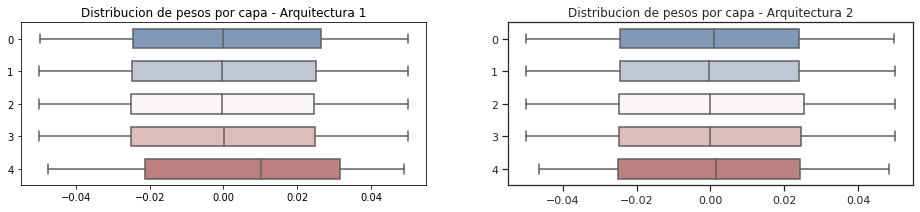

In [ ]:
weightsGraph = weights[0:10:2]
weightsGraph2 = weights2[0:10:2]

for i in range(len(weightsGraph)):
  weightsGraph[i] = weightsGraph[i].flatten()
  weightsGraph2[i] = weightsGraph2[i].flatten()

tmp = [pd.DataFrame(weightsGraph).transpose(),pd.DataFrame(weightsGraph2).transpose()]

for i in range(2):
  plt.subplot(1,2,i+1)
  plt.title("Distribucion de pesos por capa - Arquitectura "+ str(i+1))
  sns.set_theme(style="ticks")
  sns.boxplot( data=tmp[i], whis=[0, 100], width=.6, palette="vlag", orient='h')
plt.show()

Los graficos adjuntos solo confirman lo esperado, la uniformidad de los pesos iniciales del modelo.

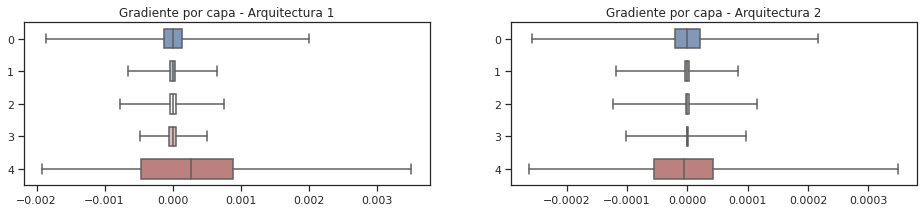

In [ ]:
gradtmp = grad[0:10:2]
gradtmp2 = grad2[0:10:2]

for i in range(len(gradtmp)):
  gradtmp[i] = gradtmp[i].numpy().flatten()
  gradtmp2[i] = gradtmp2[i].numpy().flatten()

tmpGrad = [pd.DataFrame(gradtmp).transpose(),pd.DataFrame(gradtmp2).transpose()]

for i in range(2):
  plt.subplot(1,2,i+1)
  plt.title("Gradiente por capa - Arquitectura "+ str(i+1))
  sns.set_theme(style="ticks")
  sns.boxplot( data=tmpGrad[i], whis=[0, 100], width=.6, palette="vlag", orient='h')
plt.show()

Con los boxplot generados, se puede notar que el gradientes iniciales en ambas arquitecturas (por la evaluación de un mismo conjunto de training) generan valores altos en la primera y ultima transición entre capas, lo cual puede deberse a que corresponden a capas de entrada y salida. Para el resto de los casos, hay gradientres bajos que concuerdan con la distribución uniforme de los pesos en capas intermedias.

##### II) Repita el experimento para las inicializaciones de kernel HE_uniform, Glorot normal y Glorot uniform. **Visualice, comente, y compare** 

**Pregunta** ¿Es posible inicializar los bias? ¿Cómo sería el código?


--------------- he_uniform ---------------



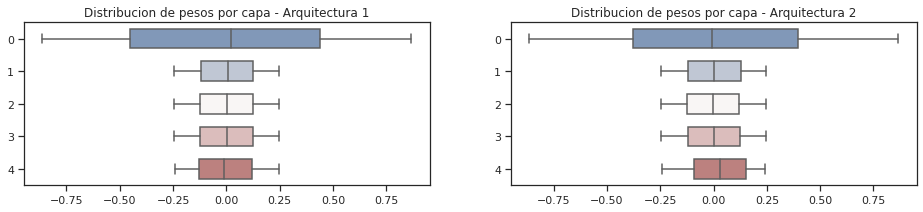

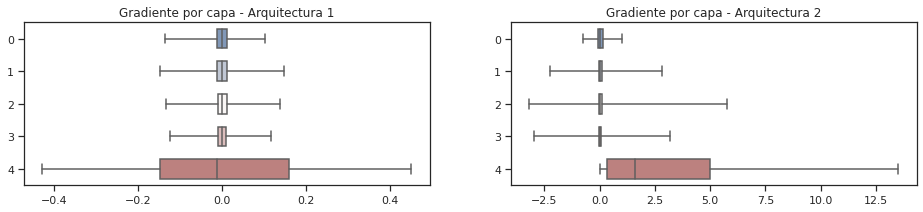


--------------- glorot_normal ---------------



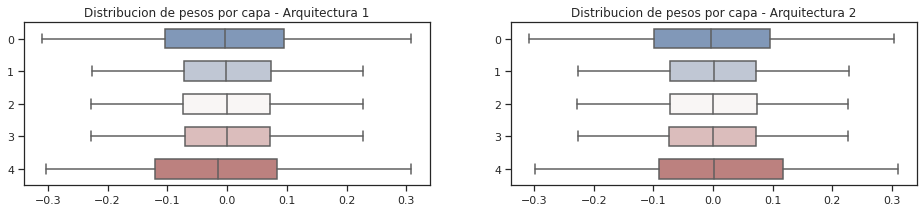

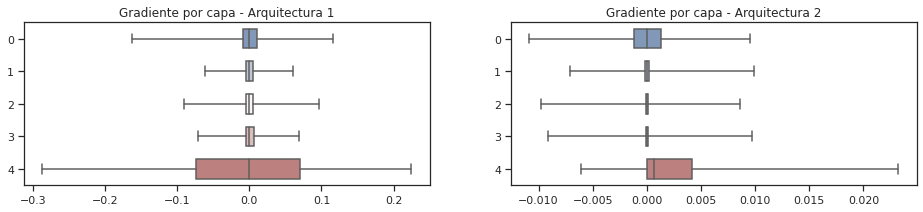


--------------- glorot_uniform ---------------



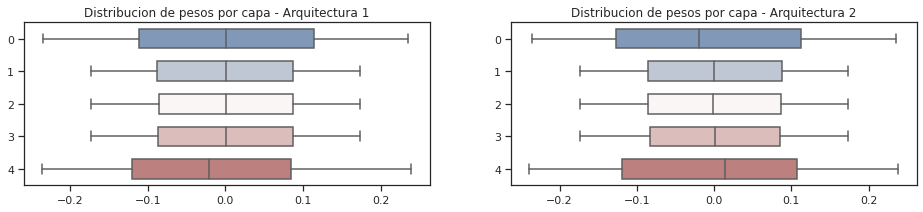

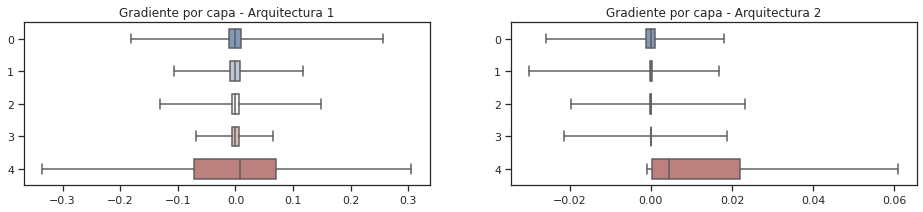

In [ ]:
kernel_initializer = ['he_uniform','glorot_normal','glorot_uniform']
# COPIAR Y PEGAR (ARREGLAR)
for ki in kernel_initializer:
  # Define architecture (1)
  input_dense= input_layer.Input(shape=(8))
  dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer=ki)(input_dense)
  dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer=ki)(dense)
  dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer=ki)(dense)
  dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer=ki)(dense)
  output_dense=layers.Dense(1, activation='tanh',use_bias=True, kernel_initializer=ki)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)

  # Define architecture (2)
  input_dense= input_layer.Input(shape=(8))
  dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer=ki)(input_dense)
  dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer=ki)(dense)
  dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer=ki)(dense)
  dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer=ki)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer=ki)(dense)
  model2=models.Model(inputs=input_dense, outputs=output_dense)

  # Get weights
  weights=model.get_weights()
  weights2=model2.get_weights()

  # Get gradient
  with tf.GradientTape() as tape:
    y_pred = model(x_tr)
    loss = tf.reduce_mean(tf.square(y_pred-y_tr)) #MSE loss
    grad=tape.gradient(loss,model.trainable_weights)

  with tf.GradientTape() as tape2:
    y_pred = model2(x_tr)
    loss = tf.reduce_mean(tf.square(y_pred-y_tr)) #MSE loss
    grad2=tape2.gradient(loss,model2.trainable_weights)
  
  print("\n--------------- " + ki + " ---------------\n")
  # distribucion de pesos
  weightsGraph = weights[0:10:2]
  weightsGraph2 = weights2[0:10:2]

  for i in range(len(weightsGraph)):
    weightsGraph[i] = weightsGraph[i].flatten()
    weightsGraph2[i] = weightsGraph2[i].flatten()

  tmp = [pd.DataFrame(weightsGraph).transpose(),pd.DataFrame(weightsGraph2).transpose()]

  for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title("Distribucion de pesos por capa - Arquitectura "+ str(i+1))
    sns.set_theme(style="ticks")
    sns.boxplot( data=tmp[i], whis=[0, 100], width=.6, palette="vlag", orient='h')
  plt.show()
  # gradientes
  gradtmp = grad[0:10:2]
  gradtmp2 = grad2[0:10:2]

  for i in range(len(gradtmp)):
    gradtmp[i] = gradtmp[i].numpy().flatten()
    gradtmp2[i] = gradtmp2[i].numpy().flatten()

  tmpGrad = [pd.DataFrame(gradtmp).transpose(),pd.DataFrame(gradtmp2).transpose()]

  for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title("Gradiente por capa - Arquitectura "+ str(i+1))
    sns.set_theme(style="ticks")
    sns.boxplot( data=tmpGrad[i], whis=[0, 100], width=.6, palette="vlag", orient='h')
  plt.show()


En general, los valores de los boxplot para cada tipo de inicializador son los esperados. Esto, pues tanto He uniform como Glorot uniform son tipos de incializadores uniformes en los que tan solo se cambian los limites [-lim, lim] en base al número de parametros de entrada y salida por capa. Por otro lado, algo parecido ocurre con Glorot normal, donde se inicializan los pesos con una distribución normal centrada en 0 y con una desviación estandar en base a los parametros de entrada y salida. Los gradientes, por su lado, cumplen el mismo comportamiento mensioinado en la sección anterior.

Si es posible inicializar los bias al agregar una capa en el modelo que se está contruyendo. Se hace con el atributo **bias_initializer** y se puede utilizar cualquiera de los inicializadores presentes en Keras. El codigo sería el siguiente:



```
Dense(100, activation='tanh',use_bias=True, , kernel_initializer="uniform", bias_initializer="zeros")(dense)
```



##### III) Utilizando las arquitecturas siguientes. **Recolecte** los pesos y gradientes al inicializar, **entrene** la red neuronal, y **recolecte** nuevamente los pesos y gradientes, junto a los errores de entrenamiento, validación y test. (En la medida de lo posible!). **Visualice, compare y comente**. Ciertos conceptos ya debiesen salir a colación para explicar lo que está sucediendo.

In [ ]:
# 1st arch
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(input_dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
output_dense=layers.Dense(1, activation='linear',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)

# 2nd arch
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(1000, activation='sigmoid',use_bias=False, kernel_initializer="he_uniform")(input_dense)
output_dense=layers.Dense(1, activation='linear',use_bias=False, kernel_initializer="uniform")(dense)
model2=models.Model(inputs=input_dense, outputs=output_dense)

# Get initial weights
weights_ini=model.get_weights()
# Get initial gradient
with tf.GradientTape() as tape:
    y_pred = model(x_tr)
    loss = tf.reduce_mean(tf.square(y_pred-y_tr)) #MSE loss
    grad_ini=tape.gradient(loss,model.trainable_weights)

# Compile model
model.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()]) #only history as callback
  
# Get final weights
weights_fin=model.get_weights()
# Get final gradient
with tf.GradientTape() as tape:
    y_pred = model(x_tr)
    loss = tf.reduce_mean(tf.square(y_pred-y_tr))
    grad_fin=tape.gradient(loss,model.trainable_weights)

# Get initial weights
weights_ini2=model2.get_weights()
# Get initial gradient
with tf.GradientTape() as tape:
    y_pred = model2(x_tr)
    loss = tf.reduce_mean(tf.square(y_pred-y_tr)) #MSE loss
    grad_ini2=tape.gradient(loss,model2.trainable_weights)

# Compile model
model2.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist2 = model2.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()]) #only history as callback
  
# Get final weights
weights_fin2=model2.get_weights()
# Get final gradient
with tf.GradientTape() as tape:
    y_pred = model2(x_tr)
    loss = tf.reduce_mean(tf.square(y_pred-y_tr))
    grad_fin2=tape.gradient(loss,model2.trainable_weights)

# ARREGLAR

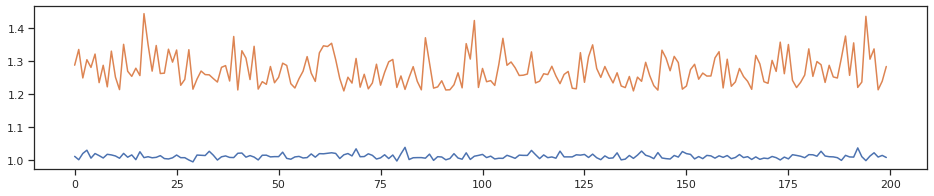

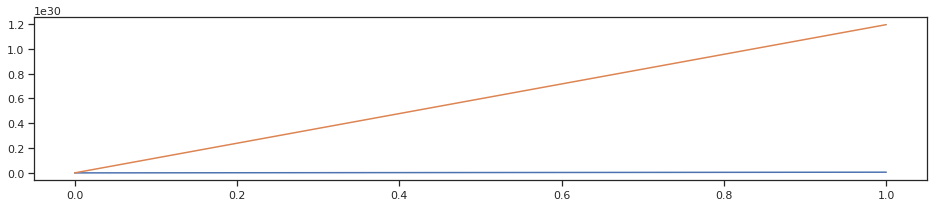

In [ ]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()
plt.plot(hist2.history["loss"])
plt.plot(hist2.history["val_loss"])
plt.show()

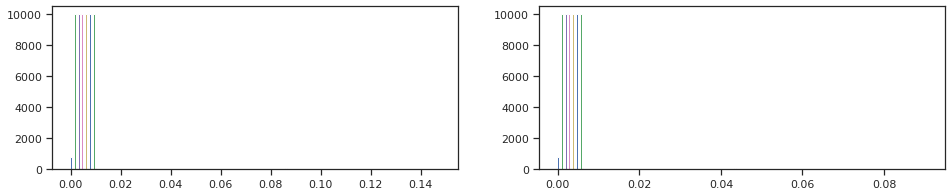

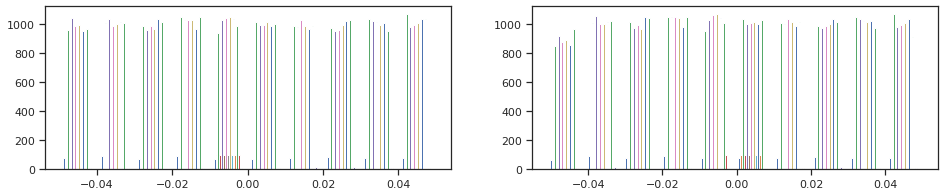

In [72]:
plt.subplot(1,2,1)
plt.hist(grad_ini)
plt.subplot(1,2,2)
plt.hist(grad_fin)
plt.show()

plt.subplot(1,2,1)
plt.hist(weights_ini)
plt.subplot(1,2,2)
plt.hist(weights_fin)
plt.show() 

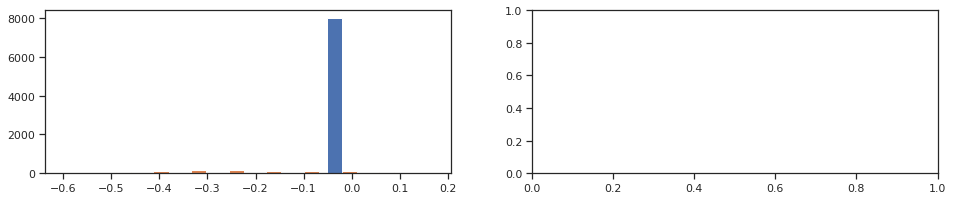

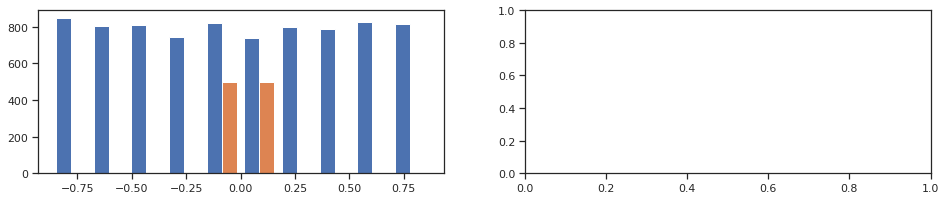

In [ ]:
plt.subplot(1,2,1)
plt.hist(grad_ini2)
plt.subplot(1,2,2)
#plt.hist(grad_fin2)
plt.show()

plt.subplot(1,2,1)
plt.hist(weights_ini2)
plt.subplot(1,2,2)
#plt.hist(weights_fin2)
plt.show() 

## 1.d Regularización

##### i) Utilizando la siguiente arquitectura experimente con regularización l1 y l2 usando distintos valores de $\lambda$ para las distintas capas, pero manteniendo el mismo tipo de regularización en ambas capas (l1 ó l2). **Entrene** 4 redes neuronales para cada norma con distintos valores de $\lambda$ en cada capa (8 redes en total). Utilice las variaciones de $\lambda$ que desee, puede usar las indicadas si desea. **Visualice y comente** los errores de entrenamiento, validación **y la resta de ambos errores** (e.d error_tr-error_val). 

**Pregunta:** ¿Cómo se comportarán los pesos de la red neuronal para la norma l1 y para la norma l2 en función de $\lambda$? **Apoyarse en visualización de los pesos al final del entrenamiento para responder la pregunta.**

In [ ]:
from keras.regularizers import l1,l2
# Variaciones de lambda: 
# En las dos capas y para cada norma probar las 4 combinaciones:
lambda_1st=[0,0.1]
lambda_2nd=[0,0.1]

modelListL1 = []
modelListL2 = []

# Define architecture

for i in range(2):
  for j in range(2):
    # Primer regularizador
    input_dense= input_layer.Input(shape=(8))
    dense=layers.Dense(500, activation='relu',activity_regularizer=l1(lambda_1st[i]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
    dense=layers.Dense(500, activation='relu',activity_regularizer=l1(lambda_2nd[j]),use_bias=True, kernel_initializer="glorot_normal")(dense)
    output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
    model=models.Model(inputs=input_dense, outputs=output_dense)
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
    # Train model
    modelListL1.append(model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()]))
    

    # Segundo regularizador
    input_dense = input_layer.Input(shape=(8))
    dense=layers.Dense(500, activation='relu',activity_regularizer=l2(lambda_1st[i]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
    dense=layers.Dense(500, activation='relu',activity_regularizer=l2(lambda_2nd[j]),use_bias=True, kernel_initializer="glorot_normal")(dense)
    output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
    model=models.Model(inputs=input_dense, outputs=output_dense)
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
    # Train model
    modelListL2.append(model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()]))

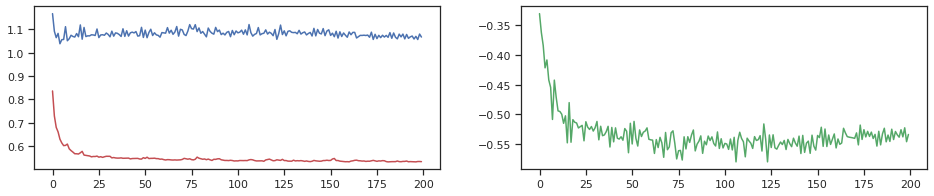

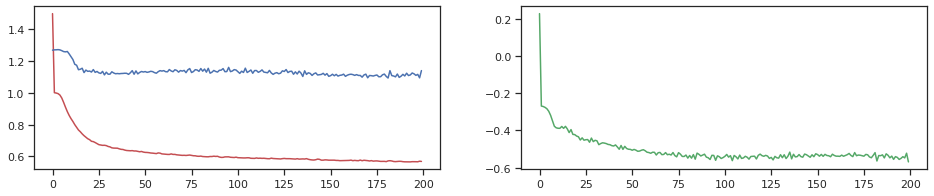

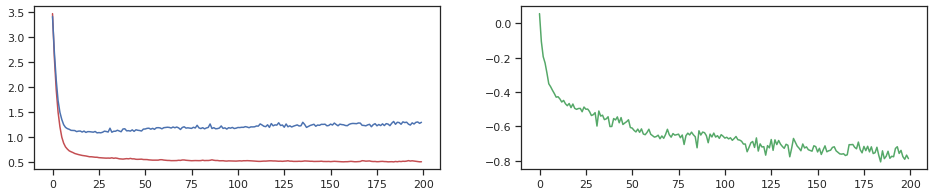

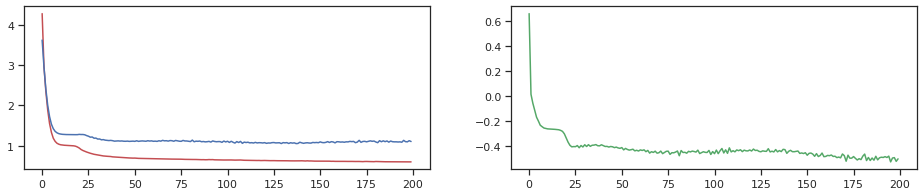

In [ ]:
for hist in modelListL1:
  plt.subplot(1,2,1)
  plt.plot(hist.history["loss"],"r")
  plt.plot(hist.history["val_loss"],"b")
  plt.subplot(1,2,2)
  plt.plot(np.asarray(hist.history["loss"])-np.asarray(hist.history["val_loss"]),"g")
  plt.show()

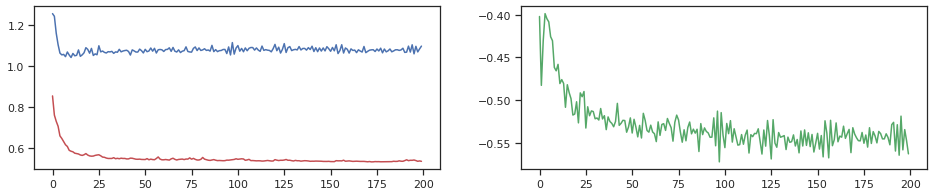

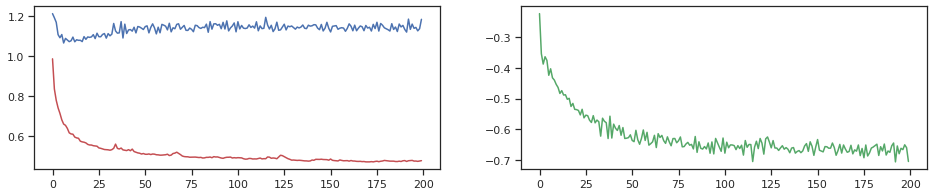

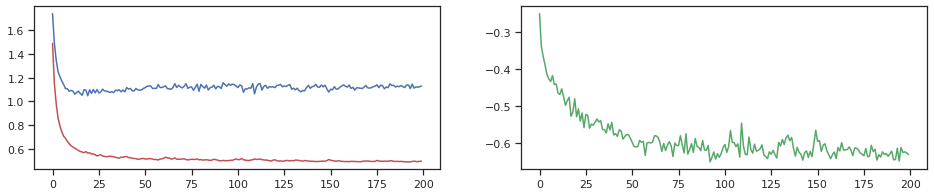

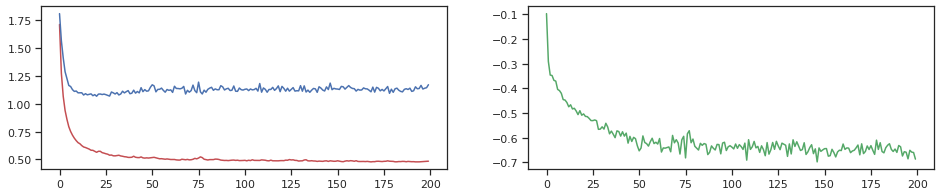

In [ ]:
for hist in modelListL2:
  plt.subplot(1,2,1)
  plt.plot(hist.history["loss"],"r")
  plt.plot(hist.history["val_loss"],"b")
  plt.subplot(1,2,2)
  plt.plot(np.asarray(hist.history["loss"])-np.asarray(hist.history["val_loss"]),"g")
  plt.show()

# Pregunta: ¿Cómo se comportarán los pesos de la red neuronal para la norma l1 y para la norma l2 en función de λ? Apoyarse en visualización de los pesos al final del entrenamiento para responder la pregunta.


##### II) Experimentaremos con el método dropout. Probaremos con distintos valores de Dropout para ambas capas de la arquitectura presentada, de manera similar al punto anterior. Entrene 9 redes neuronales utilizando las combinaciones indicadas. **Visualizar, comparar y comentar** utilizando los errores de entrenamiento, validación y la resta entre ambos valores.

**Preguntas:** ¿Qué es/hace dropout? ¿Por qué es considerado un método de regularización?

In [ ]:
dropout_1st_layer=[0,0.3,0.6]
dropout_2nd_layer=[0,0.3,0.6]

dropOutList = []

for i in range(3):
  for j in range(3):
    input_dense= input_layer.Input(shape=(8))
    dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(input_dense)
    dense=layers.Dropout(dropout_1st_layer[i])(dense)
    dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
    dense=layers.Dropout(dropout_2nd_layer[j])(dense)
    output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
    model=models.Model(inputs=input_dense, outputs=output_dense)
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')
    # Train model
    dropOutList.append(model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()]))

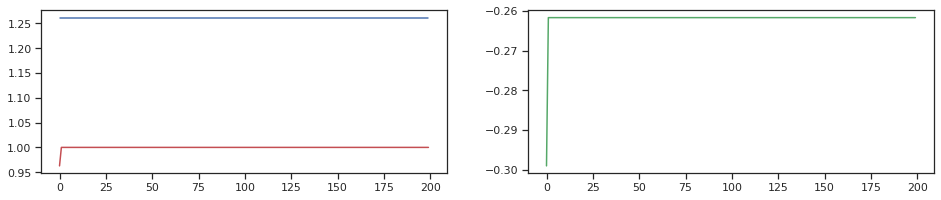

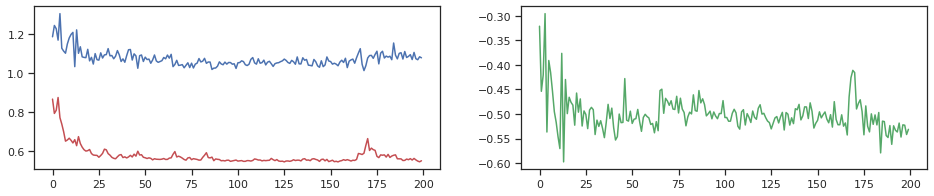

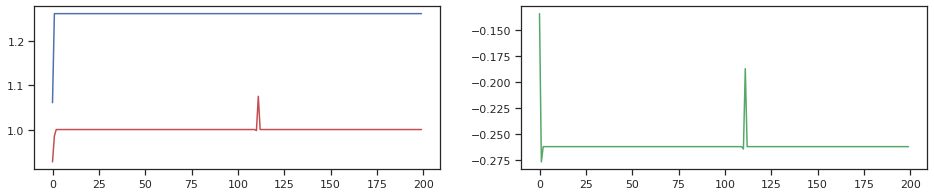

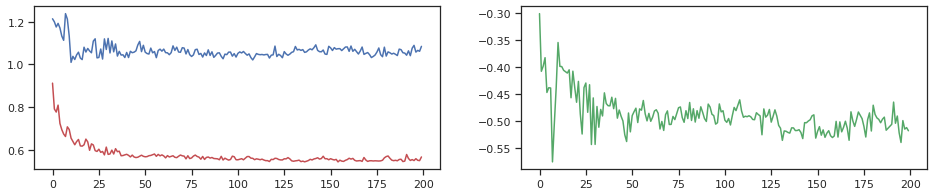

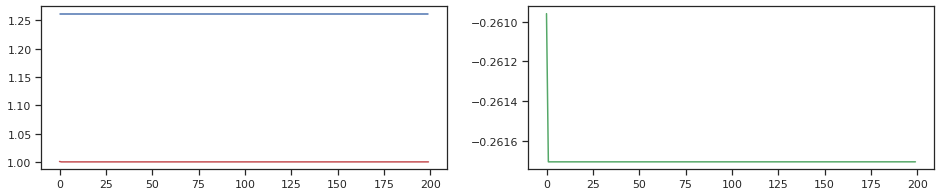

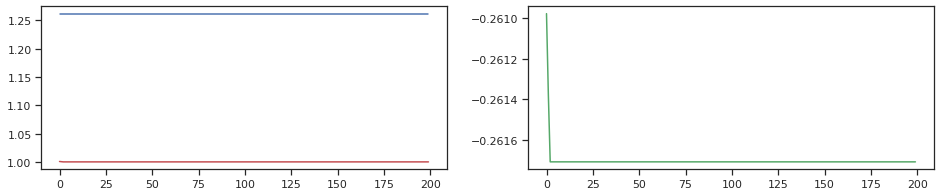

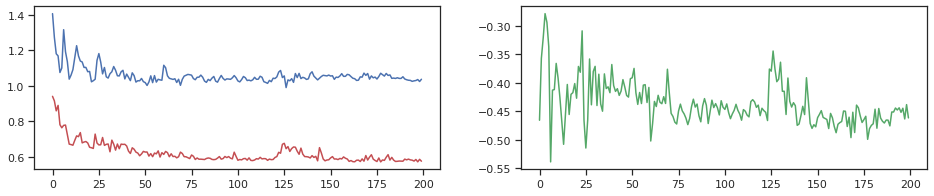

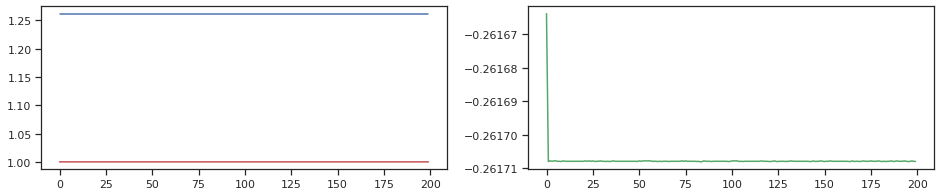

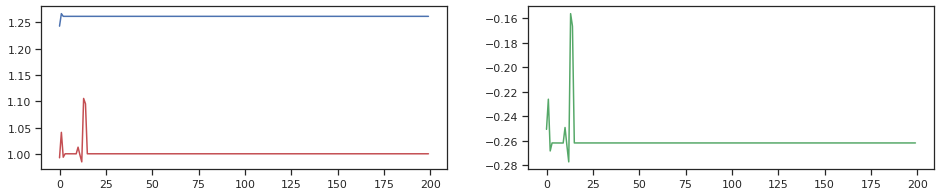

In [ ]:
for hist in dropOutList:
  plt.subplot(1,2,1)
  plt.plot(hist.history["loss"],"r")
  plt.plot(hist.history["val_loss"],"b")
  plt.subplot(1,2,2)
  plt.plot(np.asarray(hist.history["loss"])-np.asarray(hist.history["val_loss"]),"g")
  plt.show()

#  Visualizar, comparar y comentar utilizando los errores de entrenamiento, validación y la resta entre ambos valores.

## 1.e Extreme Learning Machines

##### I) Una aproximación para obtener modelos grandes que no sobreajustan es la implementada por ELM. Explique en qué consiste la idea de ELM y por qué esto podría evitar sobreajuste a pesar de utilizar modelos con gran número de parámetros.

Entrene una ELM de una capa fija y una capa oculta, la primera con un número relativamente grande. Puede utilizar los valores propuestos en el código u otros que le parezcan convenientes.

Comente sobre el número total de parámetros y el número de parametros entrenables con respecto a los modelos anteriores. 

**Preguntas:** ¿Cómo se desempeña la red? ¿El número elevado de parámetros totales implica necesariamente _overfitting_?

In [ ]:
# Define architecture
'''
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(5000, activation='relu',use_bias=True,trainable=False)(input_dense)

'''
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(units=5000, activation='relu',use_bias=True,trainable=False)(input_dense) # Input Layer
dense=layers.Dense(units=2000, activation='relu')(dense) # Hidden layer
output_dense=layers.Dense(1, activation='sigmoid',trainable=True)(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')
hist = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])




In [ ]:
model.summary()

Model: "functional_157"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_79 (InputLayer)        [(None, 8)]               0         
_________________________________________________________________
dense_252 (Dense)            (None, 5000)              45000     
_________________________________________________________________
dense_253 (Dense)            (None, 2000)              10002000  
_________________________________________________________________
dense_254 (Dense)            (None, 1)                 2001      
Total params: 10,049,001
Trainable params: 10,004,001
Non-trainable params: 45,000
_________________________________________________________________


# 2. Reconocimiento de lenguaje de señas

Una de las áreas donde las redes neuronales han obtenido desempeños decisivamente superiores al resto de los métodos existentes, al menos en su momento, es en el reconocimiento de imágenes. La capacidad de las redes convolucionaes de aprender y extraer patrones sobre patrones hasta obtener características de alto nivel, representativas de atributos de las imágenes, ha permitido desempeños superiores a los obtenidos por otros métodos de aprendizaje automático o inteligencia aritificial, e incluso en algunos casos al desempeño humano.

Una de las tareas usuales que se pueden resolver con redes neuronales convolucionales es la clasificación de imágenes. Para este punto nos basaremos en un dataset de lenguaje de señas, su descripción detallada se puede encontrar en https://www.kaggle.com/datamunge/sign-language-mnist (No es necesario descargar directamente el dataset si está usando _Colab_ como es sugerido)

<h1 align='center'> <img src="https://i1.wp.com/25.media.tumblr.com/tumblr_mdcs1cF4nn1ri2o31o1_1280.png" width="100%" height="30%" /> </h1>


Note que el entrenamiento de redes convolucionales se beneficia particularmente del uso de unidades de procesamiento gráfico, por lo cual podría ser recomendable utilizarlas en caso de disponer, o considerar correr los codigos completos una vez verificado su funcionamiento en una sesión de Collab acelerada por GPU, entre otras opciones de GPU en la nube existentes.

## 2.a Carga de datos y visualizaciones

##### I) Iniciaremos cargando los datos. Para esto necesitará crear una cuenta en kaggle, dirigirse a su perfil, ir a Account, y en la sección API apretar _Create new API token_ , se descargará un archivo kaggle.json, ábralo como archivo de texto y obtenga su username y key. Luego ejecute el siguiente código (desconozco por qué pero a veces hay que ejecutar el código 2 veces para que funcione). Solución obtenida desde el hilo: https://gist.github.com/jayspeidell/d10b84b8d3da52df723beacc5b15cb27

In [ ]:
username="gonzalooberreuter"
key="83e1317aba9cd61cdf46e2266bc0e8fe"
!pip install -q kaggle
api_token = {"username":username,"key":key}
import json
import zipfile
import os
os.environ['KAGGLE_USERNAME'] = str(username)
os.environ['KAGGLE_KEY'] = str(key)
!kaggle datasets download -d datamunge/sign-language-mnist
if not os.path.exists("/content/competitions/data_sign"):
    os.makedirs("/content/competitions/data_sign")
os.chdir('/content/competitions/data_sign')
for file in os.listdir():
    if file[-4:]==".zip":
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()
!ls

Si en el siguiente código obtiene error de directorio ejecutar de nuevo celda superior

In [ ]:
import pandas as pd
import numpy as np
df_tr=pd.read_csv("sign_mnist_train.csv")
X_tmp=df_tr.values[:,1:].reshape(-1,28,28,1)
Y_tmp=df_tr.values[:,:1]
df_tst=pd.read_csv("sign_mnist_test.csv")
X_tst=df_tst.values[:,1:].reshape(-1,28,28,1)
Y_tst=df_tst.values[:,:1]

Para evitar largos tiempos de entrenamiento y hacer más desafiante el problema, sacrificaremos data de entrenamiento. **Ejectuar el siguiente código**. Mantendremos el tamaño del conjunto de test.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sf=StratifiedShuffleSplit(n_splits=1, test_size=2000, random_state=0)
for smaller_index,data_index in sf.split(X_tmp, Y_tmp): # en realidad este método está pensado para hacer cross-validation con clases balanceadas,
                                                                        # ahora lo ocupamos solamente para extraer 1200 observaciones manteniendo la proporción de clases
                                                                          # del dataset original
    x_tmp=X_tmp[data_index]
    y_tmp=Y_tmp[data_index]

##### II) **Visualice** algunas imágenes de cada una de las catégorias junto con sus nombres. 

**Preguntas:** ¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación? ¿Por qué hay letras omitidas (inferir viendo abecedario de lenguaje de señas americano)? ¿Las categorías están balanceada? ¿Cuántos canales están disponibles?

In [ ]:
import statistics
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[16,4]
letters=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]
fig, axs = plt.subplots(1,4)
for i,ax in enumerate(axs):
  ax.imshow(x_tmp[np.where(y_tmp[:,0]==i+4)[0][0],:,:,0], cmap = "gray") 
  ax.text(1.5, 2.2, letters[i+4], bbox={'facecolor': 'white', 'pad': 3},fontsize=30)
plt.tight_layout()
plt.show()

print(x_tmp.shape)
print(y_tmp.shape)

counts = dict()
for i in y_tmp.flatten():
  counts[i] = counts.get(i, 0) + 1
trainCount = list(counts.values())
print("Clase mas pequenha: ",min(trainCount))
print("Clase mas grande: ",max(trainCount))

print("Varianza de la cantidad de imagenes por clase: ", statistics.stdev(trainCount))

Hay ciertas letras que poseen una seña muy parecida para ser representada, como por ejemplo A, E, M y S. Las letras J y Z están omitidas debido a que requieren de movimiento, y este no puede ser representado en una imagen. Las clases tienen una cantidad poco variable entre ellas, en un rango entre 70 y 92 imagenes por letra y una desviación estandar de aproximadamente 6. Las imagenes de cada clase, poseen solo un canal por ser en blanco y negro (osea, solo 1 nivel digital de 0 a 255).

## 2.b Preprocesamiento

Conforme el conjunto en entrenamiento y validacion a partir de x_tmp e y_tmp con proporciones de 80% y 20% respectivamente, preocúpese de que los conjuntos de entrnamiento y validación mantengan la proporción (aprox.) para cada clase (mantener equilibrio de clases), inspírese en el código utilizado para reducir la cantidad de datos (sección 2.a). Transforme la escala de las imágenes, de $[0,255]$ a $[-1,1]$. Utilice la función `get_dummies` de pandas para transformar $y$ a _encodding_ _one hot vector_. 

**Preguntas:**
¿Perdemos información con este preprocesamiento? ¿Qué representa cada uno de los valores de la tupla `x_tr.shape`? 

¿Podemos considerar los valores de $y$ como valores numéricos o debemos transformarlos de alguna forma? ¿Por qué? 

¿Cómo se transforma el `.shape` de $y$?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit # <- suggestion
#from keras.utils.np_utils import to_categorical
sf=StratifiedShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=0)
for smaller_index,data_index in sf.split(x_tmp, y_tmp):
  x_tr = x_tmp[smaller_index]
  y_tr = y_tmp[smaller_index]
  x_tst = x_tmp[data_index]
  y_tst = y_tmp[data_index]

x_tr = x_tr/127.5 - 1
x_tst = x_tst/127.5 - 1

print("x_tr.shape = ", x_tr.shape)

x_tmp2 = x_tr
y_tmp2 = y_tr

sf2=StratifiedShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=0)
for smaller_index,data_index in sf2.split(x_tmp2, y_tmp2):
  x_tr = x_tmp2[smaller_index]
  y_tr = y_tmp2[smaller_index]
  x_val = x_tmp2[data_index]
  y_val = y_tmp2[data_index]

print(x_tr.shape, x_val.shape, x_tst.shape)
print(y_tr.shape, y_val.shape, y_tst.shape)

print("y_tr.shape antes de transformacion = ", y_tr.shape)


y_tr = pd.get_dummies(y_tr[:,0],len(letters)).values
y_val = pd.get_dummies(y_val[:,0],len(letters)).values
y_tst = pd.get_dummies(y_tst[:,0],len(letters)).values
print("y_tr.shape despues de transformacion = ", y_tr.shape)

* No deberia perderse información con ninguna de las transformaciones del preprocesamiento, ya que se aplican funciones desde y hacia conjuntos numericos finitos o del mismo. Tanto el cambio de rango [0, 255] a [-1, 1] como el paso de entero a one hot vector corresponden a transformaciones lineales. 
* La tupla x_tr.shape = (1600, 28, 28, 1) corresponde a la cantidad de datos del conjunto de entrenamiento, las dimenciones de la imagen (28x28) y el canal digital unico al estar en blanco y negro.
* Se pueden interpretar con valores numericos, pero dependiendo de la arquitectura de la red neuronal, es mucho mas facil que la pertenencia se represente binariamente por cada clase (de ahi la transformacion a one hot vector). # ARREGLAR
* El y_tr.shape pasa de (1600, 1) a (1600, 24) pues cada dato pasa de ser un entero que representa la categoria, a un vector de 24 columnas lleno de ceros menos en la posicion de la categoria correspondiente, donde hay un 1.

## 2.c Primera red Convolucional

Entrenaremos una primera red convolucional sobre los datos, con la mayoría de los parámetros por defecto. Cree primero la red siguiendo la estructura $C\times P\times C\times P \times D$ donde $C$ representa una capa convolucional, $P$ una capa de _Max pooling_ y $D$ una capa densa. Note que antes de la capa densa debe agregar una capa _Flatten_ que transforma los filtros a vectores que luego pueden ser utilizados por la capa densa. 

Para los parámetros de las capas, fijaremos ambas capas convolucionales con 128 filtros de $3\times 3$, stride por default, y _padding 'same'_ (es decir agregaremos 0 a los bordes de la imágen de tal manera que se preserve la dimiensión de la imágen al atravesar la capa; y las capas de _pooling_ tendrán tamaño y _stride_ $2\times 2$, como muestra el código. **Note que a diferencia de la pregunta 1 aprovecharemos al máximo el lenguaje high-level keras.**

Utilice el método `.summary` del modelo para ver la cantidad de parámetros y las dimensiones de los outputs de cada capa (note que cómo en la primera capa especificamos el `input_shape` podemos llamar el método antes de compilar el modelo o de pasarle datos. **Justifique** el número parámetros y el _Output Shape_ de cada capa en función de la estructura de la red y lo aprendido en clases. 

**Preguntas:**

¿Por qué la capa de salida debe tener 24 neuronas? ¿Qué operación efectúa la activación _SoftMax_? ¿Qué representaría en terminos del problema el vector de salida de la red?

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

#Primera capa C x P
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Segunda capa C x P 
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Capa flatten y D
model.add(Flatten())    
model.add(Dense(units=24, activation='softmax')) # output

    
# summary
model.summary()

* ## ARREGLAR comentar parametros y output shape de cada capa 
* La capa densa tiene 24 neuronas para representar la pertenencia a cada una de las 24 clases presentes en el set de entrenamiento.
* La función softmax recibe la activación de la capa anterior y la transformar en una probabilidad de pertenencia a cada categoria del modelo en la capa de salida.
* El vector resultante de la capa de salida representa la letra del alfabeto ingles del lenguaje de señas presente en la imagen de entrada.

## 2.d Primer entrenamiento

##### I) Compile la red definida en el item anterior. Para esta pregunta puede usar los optimizadores configurados por defecto, y debe usar como _loss_ _Categorical Crossentropy_.

Entrene la red hasta observar convergencia recuperando su `history`. Grafique como varia el _accuracy_ en entrenamiento y validación a lo largo del aprendizaje. Adicionalmente calcule el accuracy para todo el conjunto de test. Mida igualmente el _categorical accuracy_ como se muestra en el código.  

**Preguntas:**

¿Por qué preferimos medir _crossentropy_ y no por ejemplo _MSE_ en este problema? ¿Qué valor representa el _accuracy_? ¿Le parece buena medida de desempeño para este problema? ¿Por qué luego de lograr un accuracy de 100% en el conj. de entrenamiento siguen actualizándose los pesos de la red? ¿A qué corresponde cada valor de la lista que retorna model.evaluate?

**Recordar usar entorno GPU en _Colab_**

In [ ]:
from keras.callbacks import History, EarlyStopping

my_callbacks = [History(), # Returns validation and training loss
    EarlyStopping(patience=100,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs,keep it at 100 it's only to show u
                                     restore_best_weights=True)]

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks)

In [ ]:
acc_tst = model.evaluate(x_tst, y_tst, verbose=0)

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history["acc"],label="training accuracy")
plt.plot(history.history["val_acc"],label="validation accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.axhline(y=acc_tst[0],color="k",linestyle="-.",label="test loss")
plt.legend()


* ARREGLAR
* ARREGLAR
* ARREGLAR
* Esto es debido a que el valor del _validation accuracy_ no es de 100% al momento en que el _training accuracy_ lo es, por lo que los valores de los pesos se siguen actualizando tratando de optimizar el resultado en el _validation set_.
* Model.evaluate retorna los valores del _loss_ y el _accuracy_ del conjunto que se evalua en el modelo.

Para evitar reentrenar redes al reconectarse, la red neuronal entrenada se puede guardar (arquitectura, pesos, y configuración de entrenamiento) del siguiente modo: 

Para mayor información: https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_load.ipynb#scrollTo=sI1YvCDFzpl3

---> Para verificar que estamos guardando el modelo correctamente: Iniciaremos clonando el modelo, esta función copia la arquitectura del modelo pero no mantiene los pesos.

In [ ]:
import tensorflow as tf
model_clone=tf.keras.models.clone_model(model)
[np.all(model_clone.get_weights()[i]==model.get_weights()[i]) for i in range(len(model.get_weights()))]

----> Para esto setearemos los pesos del modelo clonado igual a los pesos del modelo original.

In [ ]:
model_clone.set_weights(model.get_weights())
[np.all(model_clone.get_weights()[i]==model.get_weights()[i]) for i in range(len(model.get_weights()))]

---> Procederemos a guardar el modelo

In [ ]:
import sys
sys.path.append('saved_model')
model.save('saved_model/2_b')  #<- guardar modelo con pesos incluidos, cuidado con sobre escribir sobre modelos ya guardados
# esta función está por deprecarse, aún así de momento está funcionando
# existe la siguiente alternativa: 1) guardar los pesos del modelo model.save_weights("filepath"), 
# 2) luego al querer cargar el modelo se debe definir la arquitectura del modelo (la misma, e.d correr solo #define architecture en 1.b.i)  
# 3) usar model.set_weights(model.load_weights("filepath"))

---> Verificamos

In [ ]:
model_new=tf.keras.models.load_model('saved_model/2_b') #<- cargar modelo
[np.all(model_clone.get_weights()[i]==model_new.get_weights()[i]) for i in range(len(model_new.get_weights()))] # <- verificar

## 2.e Bloque $C\times C\times P$

Una práctica usual en redes convolucionales es apilar más de un filtro convolucional antes de aplicar _pooling_. La idea detras de esto es darle más "espacio" a la red para aprender los patrones relevantes antes de realizar el subsampleo mediante _pooling_. En el caso de este _dataset_ también nos permite agregar más capas convolucionales sin reducir tan fuertemente la dimensión de las imagenes filtradas. Incluso muchos investigadores optan por agregar más de una capa densa el final de la red, para dar aún más libertad al modelo, pues las restricciones impuestas sobre los parámetros por la estructura convolucional parecieran restringir lo suficiente al modelo, más libertad en las capas finales no pareciera implicar un _overfitting_ tan fuerte como sería por ejemplo en una red _Fully Connected_.

**Cree y entrene** una red, utilizando **dos bloques** de dos capas convolucionales y una de _maxpool_ y luego dos capas densas, es decir $C\times C\times P \times C\times C\times P\times D \times D$. Utilice $128$ filtros $3\times 3$ en las dos primeras convolucionales y $64$ filtros $3\times 3$ en las dos siguientes. Para ambas capas de _maxpool_ utilice tamaño y _stride_ $2\times 2$. 

**Comente** como se compara el desempeño con las redes anteriores. Apóyese de gráficos y valores numéricos. 

In [ ]:
model2 = Sequential()

#Primera capa C x C x P
model2.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model2.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model2.add(MaxPooling2D(pool_size=(2, 2)))

#Segunda capa C x C x P 
model2.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model2.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

#Capa flatten y D
model2.add(Flatten())    
model2.add(Dense(units=100, activation='sigmoid'))
model2.add(Dense(units=24, activation='softmax')) # output

my_callbacks2 = [History(), # Returns validation and training loss
    EarlyStopping(patience=100,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs,keep it at 100 it's only to show u
                                     restore_best_weights=True)]

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history2 = model2.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks2)

acc_tst2 = model2.evaluate(x_tst, y_tst, verbose=0)

In [ ]:
plt.subplot(1,2,1)
plt.plot(history2.history["acc"],label="training accuracy")
plt.plot(history2.history["val_acc"],label="validation accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history2.history["loss"],label="training loss")
plt.plot(history2.history["val_loss"],label="validation loss")
plt.axhline(y=acc_tst2[0],color="g",linestyle="-.",label="test loss")
plt.legend()
## Plots anteriores
plt.subplot(1,2,1)
plt.plot(history.history["acc"],label="training accuracy")
plt.plot(history.history["val_acc"],label="validation accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.axhline(y=acc_tst[0],color="k",linestyle="-.",label="test loss")
plt.legend()

# ARREGLAR 

## 2.f Exploración de profundidad

Por comodidad preferiremos quedarnos con la estructura en bloques del item anterior. En esta pregunta deberán explorar qué ocurre a medida uno cambia la profundidad de la red. Para esto, entrene redes con distintos números de bloques. Debe a lo menos entrenar una red por cada número de bloques entre 1 y 4 bloques (**¿Qué particularidad tiene la red con 4 bloques? ¿Puede entrenar una más profunda?**). También entrenar una red con "0" bloques, es decir una red densa como las de la pregunta 1. 

Comente sobre los casos extremos (0 bloques y 4 bloques), ya sea a partir de lo aprendido en clases o lo que observa al momento de entrenar las redes. **¿Le parece que alguno de los dos sea buena aproximación para reconocimiento de imágenes?** Para cada red recupere `history` y grafique el valor del mejor _accuracy_ en validación y el _accuracy_ sobre entrenamiento en el mismo _epoch_ en función de la profundidad de la red, similar al procedimiento realizado en 1.c.

Quedan a su discreción los parámetros de cada capa convolucional, puede utilizar el número de filtros que estime convenientes, utilice _stride_ por default, y en caso de utilizar alguna regla para el número de filtros, que tal regla sea la misma para todas las profundidades (pueden ver dos posibles ejemplos en el código propuesto abajo). Para las capas de _MaxPool_ utilicen las que aparecen en el código.

Para ahorrar tiempo, si observa que una red no converge, puede detener anticipadamente el entrenamiento. Para esto es recomendable usar el _Callback_ de keras `EarlyStopping` el cual deben agregar al momento de utilizar el método `.fit` (ejemplo similar en pregunta 1 y pregunta 2.d), sin embargo asegúrese de ponerle _patience_ de a lo menos 10, pues como podrá observar algunas redes empeoran su desempeño en algunas _epochs_ para luego seguir mejorando. Puede elegir monitorear la métrica que estime conveniente para esta pregunta. 


In [ ]:
import keras
historyLists = []
accuracyLists = []

for block_num in range(5):
  
    # create model
    model = Sequential()

    for i in range(block_num):
        model.add(Conv2D(int(128/(i+2)), (3,3),padding='same',activation='relu'))
        model.add(Conv2D(int(128/(i+2)), (3,3), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
    model.add(Flatten())    
    model.add(Dense(units=100, activation='sigmoid'))
    model.add(Dense(units=24, activation='softmax')) # output
    # compile

    my_callbacks = [History(), # Returns validation and training loss
        EarlyStopping(patience=90,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs,keep it at 100 it's only to show u
                                        restore_best_weights=True)]
    # train and save results
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    historyLists.append(model.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks))
    accuracyLists.append(model.evaluate(x_tst, y_tst, verbose=0))
    keras.backend.clear_session()
    

In [ ]:
bestValAcc = []
bestTrainAcc = []

for i in range(5):
  tmp = historyLists[i].history["val_acc"]
  index = tmp.index(max(tmp))
  bestValAcc.append(tmp[index])
  bestTrainAcc.append(historyLists[i].history["acc"][index])

plt.subplot(1,2,1)
plt.plot(bestValAcc, label="best accuracy in validation")
plt.plot(bestTrainAcc, label="best accuracy in training")
plt.legend()
plt.title("Accuracy[-] v/s Deepness [-]")
plt.show()

La red con 4 bloques a diferencia de sus versiones anteriores (distintas de 0) posee una mayor diferencia entre sus _accuracy_ de entrenamiento y validación, siendo que es la más profunda de todas. Si bien se pueden entrenar redes de mayor profundidad, por los resultados del experimento se infiere que tendran un menor _accuracy_. Comparando los casos extremos, se puede decir que aquella arquitectura con 0 bloques (red feedforward) no es una buena aproximación de reconocimiento de imagenes, pues si bien el _accuracy_ de entrenamiento no es tan bajo, es muy diferente al de validación por lo que se genera una perdida de la habilidad de generalizar. Por otro lado, el modelo 4 bloques es una mejor aproximación pero no la mejor.

## 2.g Exploración libre

Como probablemente ya habrán notado, la cantidad de hiperparámetros que se pueden fijar y explorar en una red convolucional es enorme. A parte de poder modificar la arquitectura de la red y su tamaño o profundidad, pueden en cada una de las capas modificar el número de filtros, el tamaño de los filtros; modificar _stride_, cambiar las activaciones, cambiar el _padding_, cambiar los tamaños de los _MaxPool_ o sus _strides_ o incluso modificar las capas densas al final de la red. 

Por motivos de tiempo y con la esperanza de que la tarea no sea más tediosa de lo necesario, en vez de pedir explorar cada uno de estos parámetros, se les propone elegir una exploración de la siguiente lista. Debe realizar la exploración exahustivamente, comentar sus resultados apoyándose de gráficos y su conocimiento teórico cuando sea apropiado. Independiente de la exploración elegida debe responder las preguntas finales. 

Para todas las exploraciones utilice como _template_ la mejor red entrenada hasta ahora y modifique el parámetro relevante. Si utiliza otra red, justifique brévemente su elección. 

**Exploraciones posibles (Elija 1)**
* Tamaño de los filtros: Manteniendo el filtro cuadrado, explore cambiar el tamaño de filtro de alguna(s) capas convolucionales. Debe explorar a lo menos valores de $1\times 1$ hasta $9\times 9$, por lo cual debe asegurarse realizar la exploración en una capa donde las dimensiones de los filtros de la capa anterior (o el Input de la capa) se lo permita. 
* Exploración del número de filtros: Explore variando el número de filtros de alguna(s) capas. Se recomienda explorar en potencias de 2, y debe explorar a lo menos 10 valores distintos.
* Neuronas capa Densa: realice una exploración del número de neuronas de alguna o ambas de las capas densas. Debe explorar a lo menos 10 combinaciones distintas. Puede dejar una de las dos capas fijas y variar la otra siguiendo potencias de 2 por ejemplo. Tenga cuidado con la explosión del número de parámetros. 
* Pooling: Pruebe cambiar el tamaño de los _MaxPool_ entre $2\times 2$ a $6\times 6$. Pruebe también cambiando todas las capas por `AveragePooling2D`, realizando la misma exploración que con _MaxPool_.
* Pooling "convolucional": Una aproximación posible para reemplazar las capas de _maxpool_ es utilizando capas convolucionales con kernel $2\times 2$ y _stride_ $2\times 2$. Pruebe reemplazando las capas _maxpool_ por este tipo de capas, luego pruebe una mezcla de ambas, luego pruebe simplemente eliminando las capas de _pooling_ y agregandole _stride_ a la segunda capa de cada bloque (con _kernel size_ $2\times 2$ y $3 \times 3$). Pruebe finalmente cambiando las funciones de activación de las capas donde se realiza la disminución de dimensión, probando a lo menos activación lineal, sigmoidea y tangente hiperbólica.

**Preguntas (responder todas)**:
* ¿A que equivaldría utilizar tamaño de kernel $1 \times 1$?
* ¿Por qué si cambiamos el número de filtros de una capa también modificamos el número de parámetros de la siguiente capa?
* ¿En su opinión, qué metodo resume mejor la información de una capa, _maxpool_ o _averagepool_?
* ¿Qué tipo de patrones esperaría usted que se extraigan mejor con un kernel no cuadrado (por ejemplo $3\times 2$)? Apoyese de un ejemplo pequeño o una explique el fenómeno llevandolo al "extremo" (e.g. $1\times 3$)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
historyLists = []
accuracyLists = []

for kS in range(1,10):
  
    # create model
    model = Sequential()

    model.add(Conv2D(128, (kS,kS),padding='same',activation='relu'))
    model.add(Conv2D(128, (kS,kS), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3,3),padding='same',activation='relu'))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
        
    model.add(Flatten())    
    model.add(Dense(units=100, activation='sigmoid'))
    model.add(Dense(units=24, activation='softmax')) # output
    # compile

    my_callbacks = [History(), # Returns validation and training loss
        EarlyStopping(patience=90,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs,keep it at 100 it's only to show u
                                        restore_best_weights=True)]
    # train and save results
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    historyLists.append(model.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks))
    accuracyLists.append(model.evaluate(x_tst, y_tst, verbose=0))
    keras.backend.clear_session()
    

In [ ]:
bestValAcc = []
bestTrainAcc = []

for i in range(9):
  tmp = historyLists[i].history["val_acc"]
  index = tmp.index(max(tmp))
  bestValAcc.append(tmp[index])
  bestTrainAcc.append(historyLists[i].history["acc"][index])

plt.subplot(1,2,1)
plt.plot(bestValAcc, label="best accuracy in validation")
plt.plot(bestTrainAcc, label="best accuracy in training")
plt.legend()
plt.title("Accuracy[-] v/s Kernel Size [-]")
plt.show()

# ARREGLAR poner otros graficos maybe, arreglar labels del xaxis
* Un kernel de 1x1 implicaría no extraer las caracteristicas o relaciones entre pixeles de las imagenes, lo cual impediría un reconocimiento de patrones o de la clase perteneciente. Basicamente se estaría copiando la imagen de una capa a otra (o parte de ella dependiendo del número de filtros).
* Esto se debe a que al variar el número de filtros se varía la dimensionalidad de la salida de la capa que se está trabajando, lo cual se traduce en un diferente número de parametros necesarios para realizar las conexión entre capas.
* Leer materia.
* Leer materia.

## 2.h Data Augmentation

Otra manera de evitar sobreajuste y mejorar los desempeños de una red convolucionar es usar aumentación de datos (Ignore el hecho de que botamos datos al inicio). La idea detrás de este método es un hecho muy simple: si rotamos ligeramente una foto por ejemplo de un caballo, seguirá siendo de un caballo. Lo mismo si la movemos ligeramente hacia algun lado, hacia arriba, _etc_.

Keras trae implementado un generador de imagenes aumentadas, puede basarse en el código abajo para utilizarlo, aunque si lo desea o estima conveniente puede cambiar alguno de los parámetros. Entrene a completitud la mejor red que obtuvo a lo largo de toda la tarea.

**Pregunta:** 

¿Qué tanto mejora el desempeño de la red utilizando aumentación de datos? 

Basándose en el abecedario de lenguaje de señas que disponemos, ¿Cree que resultará beneficioso o contraproducente realizar _flips_ horizontales y/o verticales?

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_tr)


keras.backend.clear_session()
model = Sequential()

model.add(Conv2D(128, (8,8),padding='same',activation='relu'))
model.add(Conv2D(128, (8,8), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3),padding='same',activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Flatten())    
model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=24, activation='softmax')) # output

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    
history = model.fit_generator(datagen.flow(x_tr, y_tr, batch_size=32),
                    epochs=50,
                    verbose=2,
                    callbacks=[EarlyStopping(patience=5)],
                    validation_data=(x_val,y_val),
                    validation_freq=1,
                    shuffle=True)

In [ ]:
plt.plot(history.history["val_acc"], label="best accuracy in validation")
plt.plot(history.history["acc"], label="best accuracy in training")
plt.plot(history2.history["val_acc"], label="best accuracy in validation2")
plt.plot(history2.history["acc"], label="best accuracy in training2")
plt.legend()
plt.title("Accuracy [-] v/s Epoch [-]")
plt.show()

* El _accuracy_ de validación respecto al _accuracy_ de entrenamiento es mayor en el caso de usar _data augmentation_ respecto a su no uso en la arquitectura base (hasta la epoch 20). Esto se puede fundamentar diciendo que en esta situación el modelo reconocería una mayor cantidad de imagenes con una mayor precisión. Por último, en la epoch 50 el _accuracy_ del  nuevo modelo es de todas formas comparable con el del modelo base, y pese a que el entrenamiento fue un poco más largo, el tiempo se justifica con el resultado.
* Se cree que realizar un flip horizontal sería beneficioso, pues ayudaría a incluir ambas manos con las que el lenguaje de señas se realiza y fotografias obtenidas con un celular (que las realiza en modo espejo). El flip vertical no serviría para nada.

## 2.i Matriz de Confusión

Si bien el _accuracy_ nos ha acompañado toda la pregunta para evaluar el desempeño de nuestras redes de forma fácilmente interpretable, no considera por ejemplo si una gran parte de los errores provienen de una sola clase, o si alguna clase se logra clasificar perfectamente. Una manera de visualizar fácilmente esta métrica más granular, es utilizando la matriz de confusión. Investigue y explique brévemente en qué consiste una matriz de confusión (puede explicar el caso binario donde solo hay dos clases).


Luego, apoyándose en los códigos de abajo, visualizaremos la matriz de confusión del modelo que mejor se desempeñó a lo largo de toda la tarea. 

- ¿Algo le llama la atención? 
- ¿Qué clases se confunden más entre si?
- ¿Coincidió esto con sus predicciones al inicio de la tarea? 

Igual de la misma forma que en 2.a, visualice algunas imágenes mal clasificadas por su modelo. 
- ¿Le parece razonable que el modelo no las clasifique bien?

In [ ]:
def probToOnehot(pred):
  ret = np.zeros(len(pred))
  index = np.argmax(pred)
  ret[index] = 1
  return ret

def oneHotToArray(vec):
  ret = np.zeros(len(vec))
  for i in range(len(vec)):
    ret[i] = np.argmax(vec[i])
  return ret

from sklearn.metrics import confusion_matrix 

import seaborn as sns
plt.rcParams["figure.figsize"]=[16,8]

y_pred = model.predict(x_val)
for i in range(len(y_pred)):
  y_pred[i] = probToOnehot(y_pred[i]).astype(int)

a = oneHotToArray(y_val).astype(int)
b = oneHotToArray(y_pred).astype(int)

sns.heatmap(confusion_matrix(a, b))

* Lo que destaca de la matriz de confusión es que a partir del último modelo entrenado se clasifican bien la mayoría de las imagenes presentes en el conjunto de validación.
* Las clases que se confunden más entre sí son aquellas de las letras S con la M y la I, la Q con la M, la D con la R y la K con la V.
* Si bien estas confusiones no concordaron con todas las que mencionamos, se incluyen aquellas con caracteristicas similares, que fue lo que predijimos que pasaría.
 

In [ ]:
def goBeck(vec):
  ret = (vec + 1)*127.5
  return ret

letters=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]


indexes = []

for j in range(len(a)):
  if a[j] != b[j]:
    indexes.append(j)

fig, axs2 = plt.subplots(1,4)
for i,ax2 in enumerate(axs2):
  ax2.imshow(goBeck(x_val).astype(int)[indexes[i],:,:,0], cmap = "gray") 
  ax2.text(1.5, 2.2, letters[b[indexes[i]]], bbox={'facecolor': 'white', 'pad': 3},fontsize=30)
plt.tight_layout()
plt.show()


* RESPUESTA

## 2.j Batch Normalization
Una manera propuesta de mejorar los desempeños de las redes en general, que funciona bastante bien en tareas de reconocimiento de imagenes es _Batch Normalization_. Entrene nuevamente su red preferida de la pregunta anterior, agregando capas de _Batch Normalization_ luego de cada capa de _MaxPool_. Comente sus resultados. 

**Preguntas**

Segun su conocimiento teórico y investigación, ¿Qué realiza _Batch Normalization_ en términos matemáticos? En términos de aprendizaje, ¿qué evita la utilización de _Batch Normalization_?

¿Mejoran los desempeños de la red agregando _Batch Normalization_? ¿Existe diferencias entre una capa de _batch normalization_ justo antes o justo despues de una capa de _MaxPool_ en términos numéricos? ¿Opina lo mismo en términos de aprendizaje? Discuta. 

In [ ]:
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_tr)


keras.backend.clear_session()
model = Sequential()

model.add(Conv2D(128, (9,9),padding='same',activation='relu'))
model.add(Conv2D(128, (9,9), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3),padding='same',activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
    
model.add(Flatten())    
model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=24, activation='softmax')) # output

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    
history3 = model.fit_generator(datagen.flow(x_tr, y_tr, batch_size=32),
                    epochs=50,
                    verbose=2,
                    callbacks=[EarlyStopping(patience=5)],
                    validation_data=(x_val,y_val),
                    validation_freq=1,
                    shuffle=True)

In [ ]:
plt.plot(history.history["val_acc"], label="best accuracy in validation 2h")
plt.plot(history.history["acc"], label="best accuracy in training 2h")
plt.plot(history3.history["val_acc"], label="best accuracy in validation 2j")
plt.plot(history3.history["acc"], label="best accuracy in training 2j")
plt.legend()
plt.title("Accuracy [-] v/s Epoch [-]")
plt.show()

# ARREGLAR

# 3. Interpretabilidad de CNNs, transfer learning y skip connections

Los modelos de aprendizaje automático, especialmente los modelos de aprendizaje profundo, a menudo se consideran una caja negra y difíciles de interpretar. Bueno, esta afirmación no es completamente cierta ni es completamente falsa. Es un hecho que depurar un modelo de aprendizaje profundo es mucho más difícil que otros modelos de aprendizaje automático, pero hay formas en las que puede obtener información sobre su modelo y, hasta cierto punto, puede ver lo que está sucediendo. Dado que trabajaremos con archivos .jpg mucho código vendrá dado, se darán ejemplos en el camino para que se familiarice con las herramientas sin la necesidad de entenderlas en su totalidad. **¡¡¡¡¡¡Evite trabajar de más y trabaje esta pregunta en _Colab_!!!!!** La gran mayoría del código de pre-procesamiento a utilizar, y ciertos tópicos ha cubrir, han sido sacados de https://www.kaggle.com/aakashnain/what-does-a-cnn-see/notebook , puede ocupar el código para guiarse, sin embargo se ha bajado el código para trabajar con tensorflow directamente. Aprecie que en los datasets de Kaggle, hay una sección notebooks, donde distintos usuarios suben distintas aplicaciones que le han dado al dataset en cuestión.  


<h1 align='center'> <img src="https://miro.medium.com/max/831/1*7Ip2_SeOz_BoruHEytEMlQ.png" width="60%" height="60%" /> </h1> 
<h1 align='center'></h1>

Para esto analizaremos el problema de clasificación de imágenes, en este caso clasificaremos 10 especies de monos, su descripción se puede encontrar en: https://www.kaggle.com/slothkong/10-monkey-species (No es necesario descargar el dataset trabajando en _Colab_). Este dataset será el más pesado que utilizaremos en esta tarea. **Recordar usar entorno de ejecución con acelerador GPU**. Veremos los temas de transfer learning, skip connections, y class activation mappings. Donde la primera herramienta nos ayudará a hacer el entrenamiento más ligero, la segunda nos permitirá atacar tener redes profundas con pesos fijos, y la última nos permetirá visualizar qué está viendo nuestra red CNN.


## 3.a Carga de datos (tan solo insertar datos kaggle, leer código y comentarios para entender la funcionalidad de cada celda).

##### I) Iniciaremos cargando los datos. Para esto necesitará crear una cuenta en kaggle, dirigirse a su perfil, ir a Account, y en la sección API apretar _Create new API token_ , se descargará un archivo kaggle.json, ábralo como archivo de texto y obtenga su username y key. Luego ejecute el siguiente código (desconozco por qué pero a veces hay que ejecutar el código 2 veces para que funcione). Solución obtenida desde el hilo: https://gist.github.com/jayspeidell/d10b84b8d3da52df723beacc5b15cb27

In [ ]:
username="gonzalooberreuter"
key="83e1317aba9cd61cdf46e2266bc0e8fe"

!pip install -q kaggle
api_token = {"username":username,"key":key}
import json
import zipfile
import os
os.environ['KAGGLE_USERNAME'] = str(username)
os.environ['KAGGLE_KEY'] = str(key)
!kaggle datasets download -d slothkong/10-monkey-species
if not os.path.exists("/content/competitions/monillos"):
    os.makedirs("/content/competitions/monillos")
os.chdir('/content/competitions/monillos')
for file in os.listdir():
    if file[-4:]==".zip":
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()
!ls

Ejecute el siguiente código como viene para generar los conjuntos de entrenamiento y validación, en este formato la primera columna indicará el archivo .jpg al que está ligado cada dato, y la columna labels indicará a qué clase pertenece. **Si le aparece un error de directorio volver a ejecutar celda anterior**

In [ ]:
from pathlib import Path
import pandas as pd
import cv2
import numpy as np
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

labels_dict= {'n0':0, 'n1':1, 'n2':2, 'n3':3, 'n4':4, 'n5':5, 'n6':6, 'n7':7, 'n8':8, 'n9':9}
training_data = Path('training/training/') 
validation_data = Path('validation/validation/') 
labels_path = Path('monkey_labels.txt')
# Creating a dataframe for the training dataset
train_df = []
for folder in os.listdir(training_data):
    # Define the path to the images
    imgs_path = training_data / folder
    # Get the list of all the images stored in that directory
    imgs = sorted(imgs_path.glob('*.jpg'))
    # Store each image path and corresponding label 
    for img_name in imgs:
        train_df.append((str(img_name), labels_dict[folder]))
train_df = pd.DataFrame(train_df, columns=['image', 'label'], index=None)
# shuffle the dataset 
train_df = train_df.sample(frac=1.).reset_index(drop=True)

# Creating dataframe for validation data in a similar fashion
valid_df = []
for folder in os.listdir(validation_data):
    imgs_path = validation_data / folder
    imgs = sorted(imgs_path.glob('*.jpg'))
    for img_name in imgs:
        valid_df.append((str(img_name), labels_dict[folder]))

        
valid_df = pd.DataFrame(valid_df, columns=['image', 'label'], index=None)
# shuffle the dataset 
valid_df = valid_df.sample(frac=1.).reset_index(drop=True)

OpenCV es una poderosa herramienta para computer vision:

_OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. Being a BSD-licensed product, OpenCV makes it easy for businesses to utilize and modify the code._

Procederemos a visualizar una imagen del dataset al azar. Familiarícese con las f° a utilizar

In [ ]:
# dimensions to consider for the images
img_rows, img_cols, img_channels = 224,224,3

# batch size for training  
batch_size=8

# total number of classes in the dataset
nb_classes=10

Como podrá inferir en base a la imágen mostrada, el dataset es muy pesado, por lo cual en lugar de trabajar directamente con un dataframe con los pixeles de la imágen, como en la pregunta 2, trabajaremos con la siguiente función.

In [ ]:
from keras.utils import to_categorical
def data_generator(data, batch_size, is_validation_data=False):
    # Get total number of samples in the data
    n = len(data)
    nb_batches = int(np.ceil(n/batch_size))

    # Get a numpy array of all the indices of the input data
    indices = np.arange(n)
    
    # Define two numpy arrays for containing batch data and labels
    batch_data = np.zeros((batch_size, img_rows, img_cols, img_channels), dtype=np.float32)
    batch_labels = np.zeros((batch_size, nb_classes), dtype=np.float32)
    
    while True:
        if not is_validation_data:
            # shuffle indices for the training data
            np.random.shuffle(indices)
            
        for i in range(nb_batches):
            # get the next batch 
            next_batch_indices = indices[i*batch_size:(i+1)*batch_size]
            
            # process the next batch
            for j, idx in enumerate(next_batch_indices):
                img = cv2.imread(data.iloc[idx]["image"])
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                label = data.iloc[idx]["label"]
                img = cv2.resize(img, (img_rows, img_cols)).astype(np.float32)
                batch_data[j] = img
                batch_labels[j] = to_categorical(label,num_classes=nb_classes)
            
            batch_data = preprocess_input(batch_data)
            yield batch_data, batch_labels

In [ ]:
#training data generator 
train_data_gen = data_generator(train_df, batch_size)

# validation data generator 
valid_data_gen = data_generator(valid_df, batch_size, is_validation_data=True)

##### II) Visualice una imágen para cada clase de mono indicado su raza. Básese en el siguiente código.

OpenCV es una poderosa herramienta para computer vision:

_OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. Being a BSD-licensed product, OpenCV makes it easy for businesses to utilize and modify the code._

Procederemos a visualizar una imagen del dataset al azar. Familiarícese con las f° a utilizar

In [ ]:
idx= np.random.randint(100) # <- random number
sample_image = cv2.imread(valid_df.iloc[idx]['image']) #read image from validation set
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB) #set color
sample_image = cv2.resize(sample_image, (img_rows, img_cols)) #resize, because .jpg images are from diferent size
sample_label = valid_df.iloc[idx]["label"] #get label
sample_image_processed = np.expand_dims(sample_image, axis=0) #not used here, but to transform image from (pixel,pixel,canal) to (obs, pixel, pixel, canal)
sample_image_processed = preprocess_input(sample_image_processed) #transformation for vgg16
plt.title(sample_label)
plt.imshow(sample_image)
plt.show()

## 3.b Transfer learning

El aprendizaje por transferencia es un método de aprendizaje automático en el que un modelo desarrollado para una tarea se reutiliza como punto de partida para un modelo en una segunda tarea.

Es un enfoque popular en el aprendizaje profundo en el que los modelos previamente entrenados se utilizan como punto de partida en la visión por computadora y las tareas de procesamiento del lenguaje natural, dada la gran cantidad de recursos informáticos y de tiempo necesarios para desarrollar modelos de redes neuronales sobre estos problemas y los enormes saltos en las habilidades que proporcionan sobre problemas relacionados. El concepto de transfer learning abarca más que este tipo de implementación en específico, p.ej, en el área de reinforcement learning se le puede llamar transfer learning al hecho de utilizar demostraciones humanas para ayudar a una red neuronal a resolver un _task_ o _multi-task_ en específico.

<h1 align='center'> <img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width="60%" height="60%" /> </h1> 
<h1 align='center'> VGG16 </h1> 

Para este item utilizaremos la red vgg16 como red base (info: https://neurohive.io/en/popular-networks/vgg16/) desarrollada por Oxford.

##### I) Procederemos a obtener la red VGG16 desde keras.applications, retirar su arquitectura densa, congelar sus pesos, y añadir una capa densa propia entrenable.

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dropout,Dense,Flatten
from keras.optimizers import RMSprop
from keras.callbacks import History, EarlyStopping
import tensorflow as tf
from keras.applications.vgg16 import preprocess_input
tf.keras.backend.clear_session()
tf.compat.v1.disable_eager_execution()

base_model = VGG16(input_shape=(img_rows, img_cols, img_channels), weights='imagenet', include_top=True)
#  get the output of the last layer
base_model_output = base_model.layers[-2].output
# # add new layers 
x = Dropout(0.7)(base_model_output)
output = Dense(10, activation='softmax')(x)
# define a new model 
model = tf.keras.models.Model(base_model.input, output)
# # Freeze all the base model layers
for layer in base_model.layers[:-1]:
    layer.trainable=False
my_callbacks = [History(), # Returns validation and training loss
    EarlyStopping(patience=2,monitor="val_accuracy", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)]
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(1e-3), metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# number of training and validation steps for training and validation
nb_train_steps = int(np.ceil(len(train_df)/batch_size))
nb_valid_steps = int(np.ceil(len(valid_df)/batch_size))
# number of epochs 
nb_epochs=3

hist = model.fit(train_data_gen,      # ¿Demasiado lento?, revisar estar usando entorno de ejecución en modo GPU. Debiese demorarse aprox. 40 secs por epoch. Dejar verbose
                                          # para seguir el entrenamiento, esto tomará su tiempo en comparación con las demás secciones.
                              epochs=nb_epochs, 
                              steps_per_epoch=nb_train_steps, 
                              validation_data=valid_data_gen, 
                              validation_steps=nb_valid_steps,
                              callbacks=my_callbacks)

##### II) Grafique los errores y accuracy de entrenamiento y validación a lo largo de los epochs. **Comente**

In [ ]:
monke = hist.history
plt.subplot(1,2,2)
plt.plot(monke["accuracy"],label="training accuracy")
plt.plot(monke["val_accuracy"],label="validation accuracy")
plt.legend()
plt.subplot(1,2,1)
plt.plot(monke["loss"],label="training loss")
plt.plot(monke["val_loss"],label="validation loss")
plt.legend()
plt.show()

Para evitar reentrenar redes al reconectarse, la red neuronal entrenada se puede guardar (arquitectura, pesos, y configuración de entrenamiento) del siguiente modo:

In [ ]:
import sys
sys.path.append('saved_model')
model.save('saved_model/3_b_i') #guardar
# model=tf.keras.models.load_model('saved_model/3_b_i/') #<- cargar modelo

##### III) **(Las preguntas de este ítem 3.b se tendrán que volver a implementar para futuras preguntas)** 

Realice la visualización del input (con título predicted label y true label), Class Activation Map (con título del label y salida de la red correspondiente), y superposición de input y CAM correspondiente al predicted label. **Deberá** modificar el código para obtener lo solicitado para 10 entradas distintas (1 para cada clase de mono) y su CAM para cada una de las 10 clases de monos. En total para cada clase de mono deberá obtener: 1 imágen de entrada de la clase de mono en cuestión, 10 CAM una para cada neurona del output de la red, y 1 superposición de la imágen de entrada y el CAM correspondiente a la predicción (por lo tanto, 120 imágenes en total). **Las imágenes tienen que ser claras, cada una de tamaño semejante a las que entrega el siguiente código.** Ocupe su herramienta gráfica preferida.

Apoyándose de las visualizaciones responda todas las preguntas siguientes:

**1) ¿Qué es CAM?, ¿Cómo nos ayuda a entender la visualización de nuestra CNN?** Puede limitarse a responder con la información entregada en el artículo https://medium.com/@GaganaB/class-activation-maps-551477720679 (si es que se le acabaron las visitas a medium, puede entrar en modo incógnito de manera ilimitada) y en el video https://www.youtube.com/watch?v=vTY58-51XZA&ab_channel=LazyProgrammer

**2) ¿Dónde se enfoca la red para verificar a qué clase de mono pertenece la imágen? ¿Qué estrategia asume la red para reconocer cada clase de mono?** 

In [ ]:
plt.rcParams["figure.figsize"]=[20,8]
from keras import backend as K

# get random image, true label, and predicted label
idx= 8
true_label=valid_df.iloc[idx]['label']


####### VISUALIZACIÓN INPUT
sample_image = cv2.imread(valid_df.iloc[idx]['image'])
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
sample_image = cv2.resize(sample_image, (img_rows, img_cols))
sample_label = valid_df.iloc[idx]["label"]
sample_image_processed = np.expand_dims(sample_image, axis=0)
sample_image_processed = preprocess_input(sample_image_processed)
predicted_label=np.argmax(model.predict(sample_image_processed), axis=-1)[0]
plt.subplot(1,4,1)
plt.title("Predicted label: "+str(predicted_label)+"\n True label: "+str(true_label))
plt.imshow(sample_image)# <- Image is ready to plot

##### Visualización CAM
heatmaps=[]
kk=0
predicted_label=np.argmax(model.predict(sample_image_processed), axis=-1)[0] #repeated for clearness
for k in [0,predicted_label]:
  predicted_output = model.output[:, k]
  # choose the last conv layer in your model
  last_conv_layer = model.get_layer('block5_conv3') #<....... you'll need to look what's the name of the last conv model.summary())
  grads = K.gradients(predicted_output, last_conv_layer.output)[0] #predicted output=loss, last_conv_layer=input al gradiente, ¿qué calculará el gradiente entonces?
  # take mean gradient per feature map
  grads = K.mean(grads, axis=(0,1,2))
  # Define a function that generates the values for the output and gradients
  evaluation_function = K.function([model.input], [grads, last_conv_layer.output[0]]) #en eager executions disabled estamos trabajando con tensores continuamente, 
                                                                                      # si siguen el código se darán cuenta que evaluation function mantiene 
                                                                                      # las definiciones de variables
  # get the values
  grads_values, conv_ouput_values = evaluation_function([sample_image_processed]) #run evaluation function
  # iterate over each feature map in yout conv output and multiply
  # the gradient values with the conv output values. This gives an 
  # indication of "how important a feature is"
  for i in range(conv_ouput_values.shape[-1]): # we have 512 features in our last conv layer
      conv_ouput_values[:,:,i] *= grads_values[i]
  # create a heatmap
  heatmap = np.mean(conv_ouput_values, axis=-1)
  # remove negative values
  heatmap = np.maximum(heatmap, 0)
  # re-scale
  heatmap /= heatmap.max()
  # get the heatmap for class activation map(CAM)
  heatmap = cv2.resize(heatmap, (sample_image.shape[0], sample_image.shape[1]))
  heatmap = heatmap *255
  heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  plt.subplot(1,4,2+kk)
  plt.title("CAM for class:"+ str(k)+"\n output:"+str(np.round(model.predict(sample_image_processed)[0,k],2)*100)+"%")
  plt.imshow(heatmap)# <- Image is ready to plot
  kk+=1
  heatmaps.append(heatmap) # <- correct it
# get the superimposed image
super_imposed_image = heatmaps[1] * 0.5 + sample_image #<- correct it  
super_imposed_image = np.clip(super_imposed_image, 0,255).astype(np.uint8)
plt.subplot(1,4,4)
plt.title("Superimposed image")
plt.imshow(super_imposed_image)# <- Image is ready to plot
plt.show()

##### IV) **(Las preguntas de este ítem 3.b se tendrán que volver a implementar para futuras preguntas)** Visualice los feature maps de **todas** las capas convolucionales del modelo para una entrada de su elección (mantenga el id de esta imágen para cuando tenga que visualizar nuevamente en 3.c y 3.d). Apóyese en el siguiente código que las genera para la primera capa. 

**Pregunta:** ¿Cómo se relaciona esta información respecto a lo que nos entrega CAM? ¿Qué feature map ocupa CAM para construirse?

In [ ]:

plt.subplot(1,2,1)
plt.title(sample_label)
plt.imshow(sample_image)# <- Image is ready to plot
plt.subplot(1,2,2)
plt.title(sample_label)
plt.imshow(sample_image_processed[0])# <- Image is ready to plot

plt.show()

In [ ]:
from keras.models import Sequential
def get_n_layers(max_layer, original_model):
  truncated_model = Sequential()
  for layer in range(max_layer): #first is the input
    truncated_model.add(original_model.get_layer(index=layer))
  truncated_model.summary()
  return truncated_model

In [ ]:
vis_model=get_n_layers(24,model)

In [ ]:
count = 1
size = 224
for layer in model.layers:
  # check for convolutional layer
  if 'conv' in layer.name:
    vis_model = get_n_layers(count,model)
    fet_maps_stacked = vis_model.predict(sample_image_processed)[0,:,:,:]
    feature_maps=np.zeros((size*8,size*8))
    k=0
    for i in range(8):
      for j in range(8):
          feature_map = fet_maps_stacked[:,:,k]
          feature_map -= feature_map.mean()
          feature_map /= feature_map.std()
          feature_map *=255
          feature_map = np.clip(feature_map, 0, 255).astype(np.uint8)
          feature_maps[size*i:size*(i+1),size*j:size*(j+1)]=feature_map
          k+=1
    plt.subplot(1,2,1)
    plt.title("Predicted label: "+str(np.argmax(model.predict(sample_image_processed), axis=-1)[0])+"\n True label: "+str(true_label))
    plt.imshow(sample_image)# <- Image is ready to plot
    plt.subplot(1,2,2)
    plt.imshow(feature_maps)
    plt.tight_layout()
    plt.show()
  elif 'pool' in layer.name:
    size = layer.output_shape[1]
  count+=1
  

## 3.c Transfer learning parte II
I) **Repetir los puntos I) a IV) de la sección anterior** usando como red base VGG19 (Si es que desea utilizar otra no hay problema, visitar: https://keras.io/api/applications/). Para la visualización de CAM y feature maps, use las mismas imágenes de entrada para mejor comparación.


**A partir de los resultados responda: ¿Cómo cambió la estrategia de esta red respecto a la del punto anterior?**

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
tf.keras.backend.clear_session()
tf.compat.v1.disable_eager_execution()

base_model = VGG19(input_shape=(img_rows, img_cols, img_channels), weights='imagenet', include_top=True)
#  get the output of the last layer
base_model_output = base_model.layers[-2].output
# # add new layers 
x = Dropout(0.7)(base_model_output)
output = Dense(10, activation='softmax')(x)
# define a new model 
model = tf.keras.models.Model(base_model.input, output)
# # Freeze all the base model layers
for layer in base_model.layers[:-1]:
    layer.trainable=False
my_callbacks = [History(), # Returns validation and training loss
    EarlyStopping(patience=2,monitor="val_accuracy", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)]
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(1e-3), metrics=['accuracy'])

model.summary()

In [ ]:
# number of training and validation steps for training and validation
nb_train_steps = int(np.ceil(len(train_df)/batch_size))
nb_valid_steps = int(np.ceil(len(valid_df)/batch_size))
# number of epochs 
nb_epochs=3

hist = model.fit(train_data_gen,      # ¿Demasiado lento?, revisar estar usando entorno de ejecución en modo GPU. Debiese demorarse aprox. 40 secs por epoch. Dejar verbose
                                          # para seguir el entrenamiento, esto tomará su tiempo en comparación con las demás secciones.
                              epochs=nb_epochs, 
                              steps_per_epoch=nb_train_steps, 
                              validation_data=valid_data_gen, 
                              validation_steps=nb_valid_steps,
                              callbacks=my_callbacks)

In [ ]:
monke = hist.history
plt.subplot(1,2,2)
plt.plot(monke["accuracy"],label="training accuracy")
plt.plot(monke["val_accuracy"],label="validation accuracy")
plt.legend()
plt.subplot(1,2,1)
plt.plot(monke["loss"],label="training loss")
plt.plot(monke["val_loss"],label="validation loss")
plt.legend()
plt.show()

II) ARREGLAR

In [ ]:
import sys
sys.path.append('saved_model')
model.save('saved_model/3_c_i') #guardar
# model=tf.keras.models.load_model('saved_model/3_b_i/') #<- cargar modelo

In [ ]:
plt.rcParams["figure.figsize"]=[20,8]
from keras import backend as K

# get random image, true label, and predicted label

####### VISUALIZACIÓN INPUT
sample_image_processed = np.expand_dims(sample_image, axis=0)
sample_image_processed = preprocess_input(sample_image_processed)
predicted_label=np.argmax(model.predict(sample_image_processed), axis=-1)[0]

plt.subplot(1,4,1)
plt.title("Predicted label: "+str(predicted_label)+"\n True label: "+str(true_label))
plt.imshow(sample_image)# <- Image is ready to plot

##### Visualización CAM
heatmaps=[]
kk=0
predicted_label=np.argmax(model.predict(sample_image_processed), axis=-1)[0] #repeated for clearness
for k in [0,predicted_label]:
  predicted_output = model.output[:, k]
  # choose the last conv layer in your model
  last_conv_layer = model.get_layer('block5_conv3') #<....... you'll need to look what's the name of the last conv model.summary())
  grads = K.gradients(predicted_output, last_conv_layer.output)[0] #predicted output=loss, last_conv_layer=input al gradiente, ¿qué calculará el gradiente entonces?
  # take mean gradient per feature map
  grads = K.mean(grads, axis=(0,1,2))
  # Define a function that generates the values for the output and gradients
  evaluation_function = K.function([model.input], [grads, last_conv_layer.output[0]]) #en eager executions disabled estamos trabajando con tensores continuamente, 
                                                                                      # si siguen el código se darán cuenta que evaluation function mantiene 
                                                                                      # las definiciones de variables
  # get the values
  grads_values, conv_ouput_values = evaluation_function([sample_image_processed]) #run evaluation function
  # iterate over each feature map in yout conv output and multiply
  # the gradient values with the conv output values. This gives an 
  # indication of "how important a feature is"
  for i in range(conv_ouput_values.shape[-1]): # we have 512 features in our last conv layer
      conv_ouput_values[:,:,i] *= grads_values[i]
  # create a heatmap
  heatmap = np.mean(conv_ouput_values, axis=-1)
  # remove negative values
  heatmap = np.maximum(heatmap, 0)
  # re-scale
  heatmap /= heatmap.max()
  # get the heatmap for class activation map(CAM)
  heatmap = cv2.resize(heatmap, (sample_image.shape[0], sample_image.shape[1]))
  heatmap = heatmap *255
  heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  plt.subplot(1,4,2+kk)
  plt.title("CAM for class:"+ str(k)+"\n output:"+str(np.round(model.predict(sample_image_processed)[0,k],2)*100)+"%")
  plt.imshow(heatmap)# <- Image is ready to plot
  kk+=1
  heatmaps.append(heatmap) # <- correct it
# get the superimposed image
super_imposed_image = heatmaps[1] * 0.5 + sample_image #<- correct it  
super_imposed_image = np.clip(super_imposed_image, 0,255).astype(np.uint8)
plt.subplot(1,4,4)
plt.title("Superimposed image")
plt.imshow(super_imposed_image)# <- Image is ready to plot
plt.show()

III) ARREGLAR

In [ ]:
plt.subplot(1,2,1)
plt.title(sample_label)
plt.imshow(sample_image)# <- Image is ready to plot
plt.subplot(1,2,2)
plt.title(sample_label)
plt.imshow(sample_image_processed[0])# <- Image is ready to plot

plt.show()

In [ ]:
count = 1
size = 224
for layer in model.layers:
  # check for convolutional layer
  if 'conv' in layer.name:
    vis_model = get_n_layers(count,model)
    fet_maps_stacked = vis_model.predict(sample_image_processed)[0,:,:,:]
    feature_maps=np.zeros((size*8,size*8))
    k=0
    for i in range(8):
      for j in range(8):
          feature_map = fet_maps_stacked[:,:,k]
          feature_map -= feature_map.mean()
          feature_map /= feature_map.std()
          feature_map *=255
          feature_map = np.clip(feature_map, 0, 255).astype(np.uint8)
          feature_maps[size*i:size*(i+1),size*j:size*(j+1)]=feature_map
          k+=1
    plt.subplot(1,2,1)
    plt.title("Predicted label: "+str(np.argmax(model.predict(sample_image_processed), axis=-1)[0])+"\n True label: "+str(true_label))
    plt.imshow(sample_image)# <- Image is ready to plot
    plt.subplot(1,2,2)
    plt.imshow(feature_maps)
    plt.tight_layout()
    plt.show()
  elif 'pool' in layer.name:
    size = layer.output_shape[1]
  count+=1

IV) ARREGLAR

## 3.d CNN con skip connections

Otra manera de mejorar los resultados de las redes, sobretodo de las redes profundas donde se observa el problema de _vanishing gradient_ son las relativamente nuevas _skip connections_ o redes residuales. En vez de preocuparse de cómo manejar los pesos de la red para permitir que el gradiente no explote o no desaparezca, se permite al gradiente "pasar" sin ser modificado, agregando conecciones con pesos fijos entre capas de distintas profundidades, en la práctica permitiendo a la señar "saltarse" las capas intermedias. Esta idea ha permitido desarrollos como los de ResNet, llegando a profundidades de cientos de capas y aún logrando aprendizaje. 

Basandose en el código mostrado abajo, implemente una ResNet de su gusto. _Tip: Utilice BatchNormalization después de cada capa convolucional._

**Obtenga un accuracy de validación superior al 50%**. _No tenga miedo de subir la profundidad, pero sí de la cantidad de hiperparámetros a entrenar, checkear model.summary()_

**Repita los pasos II) a IV) de las secciones anteriores. Comente**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input, concatenate
from keras.optimizers import RMSprop
from keras.callbacks import History, EarlyStopping
from keras.layers.normalization import BatchNormalization
tf.keras.backend.clear_session()
tf.compat.v1.disable_eager_execution()

x = Input(shape=(img_rows, img_cols, img_channels))

y = Conv2D(64, (3,3),padding='same',activation='relu')(x)
y = BatchNormalization()(y)
y = Conv2D(64, (3,3),padding='same',activation='relu')(y)
y = BatchNormalization()(y)
z = concatenate([x, y])

z = MaxPooling2D(pool_size=(2, 2))(z)

y = Conv2D(64, (3,3),padding='same',activation='relu')(z)
y = BatchNormalization()(y)
y = Conv2D(64, (3,3),padding='same',activation='relu')(y)
y = BatchNormalization()(y)
z = concatenate([z, y])

z = MaxPooling2D(pool_size=(2, 2))(z)

y = Conv2D(64, (3,3),padding='same',activation='relu')(z)
y = BatchNormalization()(y)
y = Conv2D(64, (3,3),padding='same',activation='relu')(y)
y = BatchNormalization()(y)
z = concatenate([z, y])

z = MaxPooling2D(pool_size=(2, 2))(z)

y = Conv2D(64, (3,3),padding='same',activation='relu')(z)
y = BatchNormalization()(y)
y = Conv2D(64, (3,3),padding='same',activation='relu')(y)
y = BatchNormalization()(y)
z = concatenate([z, y])

z = MaxPooling2D(pool_size=(2, 2))(z)

y = Conv2D(64, (3,3),padding='same',activation='relu')(z)
y = BatchNormalization()(y)
y = Conv2D(64, (3,3),padding='same',activation='relu')(y)
y = BatchNormalization()(y)
z = concatenate([z, y])

##############

z = Flatten()(z)
z = Dense(256 + 64, activation='relu')(z)
z = BatchNormalization()(z)
out = Dense(10, activation='softmax')(z)

res_mod = tf.keras.models.Model(x,out)

my_callbacks = [History(), # Returns validation and training loss
    EarlyStopping(patience=2,monitor="val_accuracy", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs,keep it at 100 it's only to show u
                                     restore_best_weights=True)]


optimizer = RMSprop(0.001)
res_mod.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# summary
res_mod.summary()

In [ ]:
# number of training and validation steps for training and validation
nb_train_steps = int(np.ceil(len(train_df)/batch_size))
nb_valid_steps = int(np.ceil(len(valid_df)/batch_size))
# number of epochs 
nb_epochs=10 # si no obtuvo el resultado deseado en 10 epochs 

hist4 = res_mod.fit(train_data_gen,      # ¿Demasiado lento?, revisar estar usando entorno de ejecución en modo GPU. Debiese demorarse aprox. 40 secs por epoch. Dejar verbose
                                          # para seguir el entrenamiento, esto tomará su tiempo en comparación con las demás secciones.
                              epochs=nb_epochs, 
                              steps_per_epoch=nb_train_steps, 
                              validation_data=valid_data_gen, 
                              validation_steps=nb_valid_steps,
                              callbacks=my_callbacks)

In [ ]:
monke = hist4.history
plt.subplot(1,2,2)
plt.plot(monke["accuracy"],label="training accuracy")
plt.plot(monke["val_accuracy"],label="validation accuracy")
plt.legend()
plt.subplot(1,2,1)
plt.plot(monke["loss"],label="training loss")
plt.plot(monke["val_loss"],label="validation loss")
plt.legend()
plt.show()

II) ARREGLAR

In [ ]:
import sys
sys.path.append('saved_model')
#res_mod.save('saved_model/3_d') #guardar
#res_mod=tf.keras.models.load_model('saved_model/3_d') #<- cargar modelo

In [ ]:
plt.rcParams["figure.figsize"]=[20,8]
from keras import backend as K

####### VISUALIZACIÓN INPUT
sample_image_processed = np.expand_dims(sample_image, axis=0)
sample_image_processed = preprocess_input(sample_image_processed)
predicted_label=np.argmax(res_mod.predict(sample_image_processed), axis=-1)
plt.subplot(1,4,1)
plt.title("Predicted label: "+str(predicted_label)+"\n True label: "+str(true_label))
plt.imshow(sample_image)# <- Image is ready to plot

##### Visualización CAM
heatmaps=[]
kk=0
predicted_label=np.argmax(res_mod.predict(sample_image_processed), axis=-1)[0] #repeated for clearness
for k in [0,predicted_label]:
  predicted_output = res_mod.output[:, k]
  # choose the last conv layer in your model
  last_conv_layer = res_mod.get_layer('conv2d_9') #<....... you'll need to look what's the name of the last conv model.summary())
  grads = K.gradients(predicted_output, last_conv_layer.output)[0] #predicted output=loss, last_conv_layer=input al gradiente, ¿qué calculará el gradiente entonces?
  # take mean gradient per feature map
  grads = K.mean(grads, axis=(0,1,2))
  # Define a function that generates the values for the output and gradients
  evaluation_function = K.function([res_mod.input], [grads, last_conv_layer.output[0]]) #en eager executions disabled estamos trabajando con tensores continuamente, 
                                                                                      # si siguen el código se darán cuenta que evaluation function mantiene 
                                                                                      # las definiciones de variables
  # get the values
  grads_values, conv_ouput_values = evaluation_function([sample_image_processed]) #run evaluation function
  # iterate over each feature map in yout conv output and multiply
  # the gradient values with the conv output values. This gives an 
  # indication of "how important a feature is"
  for i in range(conv_ouput_values.shape[-1]): # we have 512 features in our last conv layer
      conv_ouput_values[:,:,i] *= grads_values[i]
  # create a heatmap
  heatmap = np.mean(conv_ouput_values, axis=-1)
  # remove negative values
  heatmap = np.maximum(heatmap, 0)
  # re-scale
  heatmap /= heatmap.max()
  # get the heatmap for class activation map(CAM)
  heatmap = cv2.resize(heatmap, (sample_image.shape[0], sample_image.shape[1]))
  heatmap = heatmap *255
  heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  plt.subplot(1,4,2+kk)
  plt.title("CAM for class:"+ str(k)+"\n output:"+str(np.round(res_mod.predict(sample_image_processed)[0,k],2)*100)+"%")
  plt.imshow(heatmap)# <- Image is ready to plot
  kk+=1
  heatmaps.append(heatmap) # <- correct it
# get the superimposed image
super_imposed_image = heatmaps[1] * 0.5 + sample_image #<- correct it  
super_imposed_image = np.clip(super_imposed_image, 0,255).astype(np.uint8)
plt.subplot(1,4,4)
plt.title("Superimposed image")
plt.imshow(super_imposed_image)# <- Image is ready to plot
plt.show()

III) ARREGLAR

In [ ]:
plt.subplot(1,2,1)
plt.title(sample_label)
plt.imshow(sample_image)# <- Image is ready to plot
plt.subplot(1,2,2)
plt.title(sample_label)
plt.imshow(sample_image_processed[0])# <- Image is ready to plot

plt.show()

In [ ]:
size = res_mod.layers[27].output_shape[1]
'''
count = 0
for layer in res_mod.layers:
  print(layer.output_shape, count)
  count+=1
  '''
fet_maps_stacked = res_mod.layers[27].predict(sample_image_processed)[0,:,:,:]
feature_maps=np.zeros((size*8,size*8))
k=0
for i in range(8):
  for j in range(8):
      feature_map = fet_maps_stacked[:,:,k]
      feature_map -= feature_map.mean()
      feature_map /= feature_map.std()
      feature_map *=255
      feature_map = np.clip(feature_map, 0, 255).astype(np.uint8)
      feature_maps[size*i:size*(i+1),size*j:size*(j+1)]=feature_map
      k+=1
plt.subplot(1,2,1)
plt.title("Predicted label: "+str(np.argmax(res_mod.predict(sample_image_processed), axis=-1)[0])+"\n True label: "+str(true_label))
plt.imshow(sample_image)# <- Image is ready to plot
plt.subplot(1,2,2)
plt.imshow(feature_maps)
plt.tight_layout()
plt.show()

IV) ARREGLAR